<a id='Table_of_Contents'></a>
## Table of Contents:
* (1) [Load and Review Data](#Load_and_Review_Data)
* (2) [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * (a) [Univariate Analysis](#Univariate_Analysis)
    * (b) [Bivariate Analysis](#Bivariate_Analysis)
    * (c) [Initial Insights](#Initial_Insights)
* (3) [Data Pre-Processing](#Data_Pre-Processing)
* (4) [K-means Clustering](#K-means_Clustering)
* (5) [Hierarchical Clustering](#Hierarchical_Clustering) 
* (6) [Compare Clustering Algorithms](#Compare_Clustering_Algorithms)
* (7) [Actionable Insights and Recommendations](#Insights_and_Recommendations)


## Objective:
* Use customer credit card spending patterns as well as past interactions with AllLife to determine different customer segments.

## Problem Questions:
1. Gain insights from Exploratory Data Analysis
2. Determine the appropriate number of clusters based on applied algorithms.
3. Determine differences among customer profiles.
4. Offer recommendations to the bank on how to better market to and serve each customer segment.

## Dataset:
* SI_No: Serial number
* Customer Key: Customer ID
* Avg_Credit_Limit: Average credit limit of a customer's different credit cards
* Total_Credit_Cards: Number of credit cards possesed by customer
* Total_visits_bank: Number of times the customer has visited the bank
* Total_visits_online: Number of times the customer has visited the website online
* Total_calls_made: Number of times the customer called the bank

## Problem Context:
The marketing team at AllLife bank is seeking to run targeted marketing campains for specific segments of credit card customers, and the operations team would like insights on how to more quickly resolve queries from credit card customers and improve customer service.

Insight gained from analysis of the data set may help AllBank maintain its current market share as well as increase its base of credit card users.

One metric to measure marketing and operations success is the number of credit cards the customer has with the bank.

## Import Libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with k-means clustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Libraries to help with hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering




<a id='Load_and_Review_Data'></a>
# (1) Load and Review Data

In [2]:
bank_df = pd.read_csv('/Users/jordan/DBSA Jupyter Notebooks/Projects/AllLife Customer Segmentation/Credit Card Customer Data.csv')

**Copy dataframe and look at first and last rows**

In [3]:
data = bank_df.copy()
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
data.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


**Look at random rows**

In [5]:
np.random.seed(1)
data.sample(n=10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


**Check the shape of the dataset**

In [6]:
data.shape

(660, 7)

***
* There are 660 rows and 7 columns.
***

**List column names**

In [7]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

**Check data types of columns**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


***
* There are no categorical variables.
***

**Check unique values in columns**

In [9]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

***
* `Sl_No` and `Customer Key` columns seem to have unique values for most rows, as such they will not provide much value to the analysis and should be dropped.
***

**Drop columns**

In [10]:
data.drop(['Sl_No','Customer Key'],axis=1,inplace=True)
print(f'There are now {data.shape[0]} rows and {data.shape[1]} columns.')
data.head()

There are now 660 rows and 5 columns.


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [11]:
all_col = list(data.columns) # create list of columns

**Check for duplicates**

In [12]:
data.duplicated(keep= False).value_counts()

False    638
True      22
dtype: int64

**View duplicate rows**

In [13]:
duplicateRows = data[data.duplicated(keep = 'first')]
print(f'There are {len(duplicateRows)} duplicate rows.')
duplicateRows

There are 11 duplicate rows.


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


***
* It is possible for some customers to have the same information in each column, and since there are so few duplicates, it may not be necessary to remove these rows.
***

**Check missing values**

In [14]:
data.isnull().sum().sort_values(ascending=False)

Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
dtype: int64

***
* There are no missing values.
***

**Summary of data**

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


***
* `Avg_Credit_Limit` has a high standard deviation. Although it is expected that there would be high variability between credit limits. 
* The median number for  `Total_Credit_Cards` is 5.
* The max number for `Total_visits_bank` is 5, and the max number for `Total_visits_online` is 15.
***

In [16]:
# Look at the unique values of each column
column = all_col
for col in column:
    print('Unique Values of {} are \n'.format(col),data[col].unique())
    print('*'*90)

Unique Values of Avg_Credit_Limit are 
 [100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000 157000  94000
 163000 131000  96000 136000 121000 158000 108000 166000 176000 178000
  91000 156000 146000  84000 155000 200000 195000 187000 106000 114000
 126000 173000 153000 184000 123000 144000  97000  98000 127000 171000
 186000 183000 111000 112000 132000  95000 172000  99000 145000 167000]
******************************************************************************************
Unique Values of Total_Credit_Cards are 
 [ 2  3  7  5  6  4  1  9  8 10]
*************

In [17]:
# How many customers have credit limits over $100,000
highLimits = data[data.Avg_Credit_Limit > 100000]
num_highLimits = len(highLimits)
print(f'There are {num_highLimits} customers with credit limits in the six figures.')
highLimits.value_counts('Avg_Credit_Limit')

There are 39 customers with credit limits in the six figures.


Avg_Credit_Limit
172000    2
195000    2
156000    2
163000    2
166000    2
127000    1
136000    1
132000    1
131000    1
200000    1
145000    1
126000    1
123000    1
121000    1
114000    1
112000    1
111000    1
108000    1
144000    1
155000    1
146000    1
153000    1
157000    1
158000    1
167000    1
171000    1
173000    1
176000    1
178000    1
183000    1
184000    1
186000    1
187000    1
106000    1
dtype: int64

***
* It looks like there may be some outliers for `Avg_Credit_Limit`.

[[Table of Contents](#Table_of_Contents)]
***

<a id='Exploratory_Data_Analysis'></a>
# (2) EDA

<a id='Univariate_Analysis'></a>
## Univariate Analysis

In [18]:
# This function takes a numerical column as the input and returns boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

Avg_Credit_Limit:
**************************************************


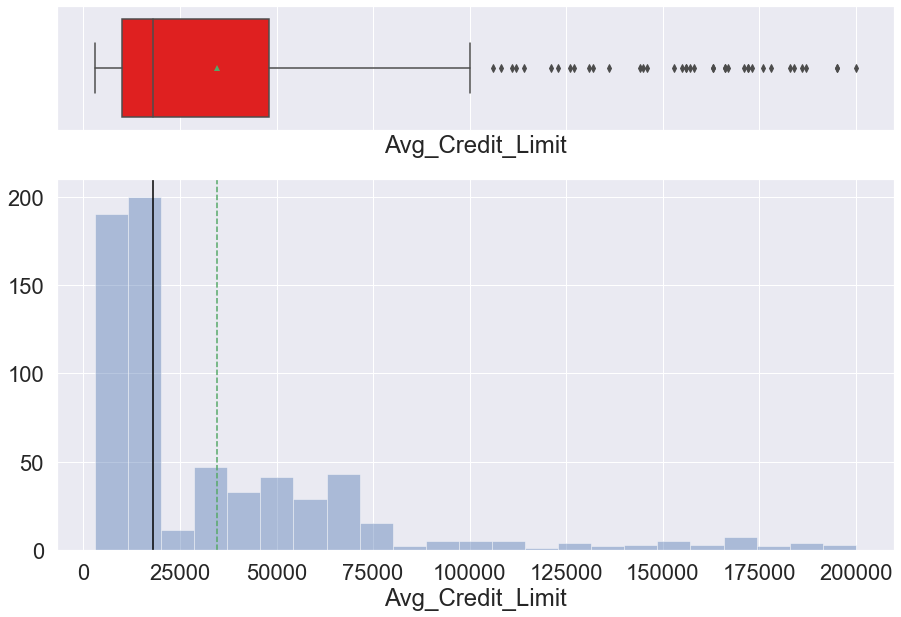




Total_Credit_Cards:
**************************************************


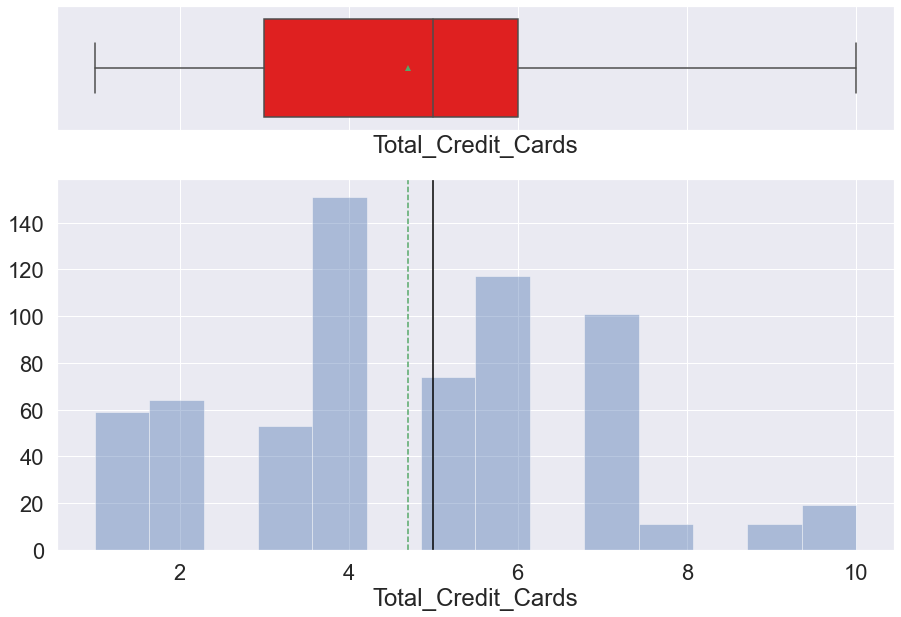




Total_visits_bank:
**************************************************


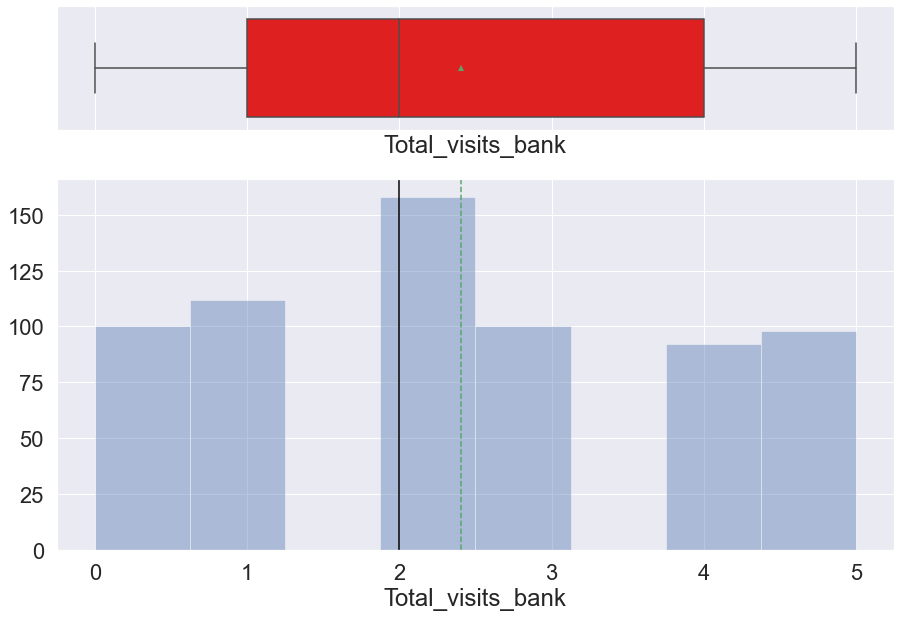




Total_visits_online:
**************************************************


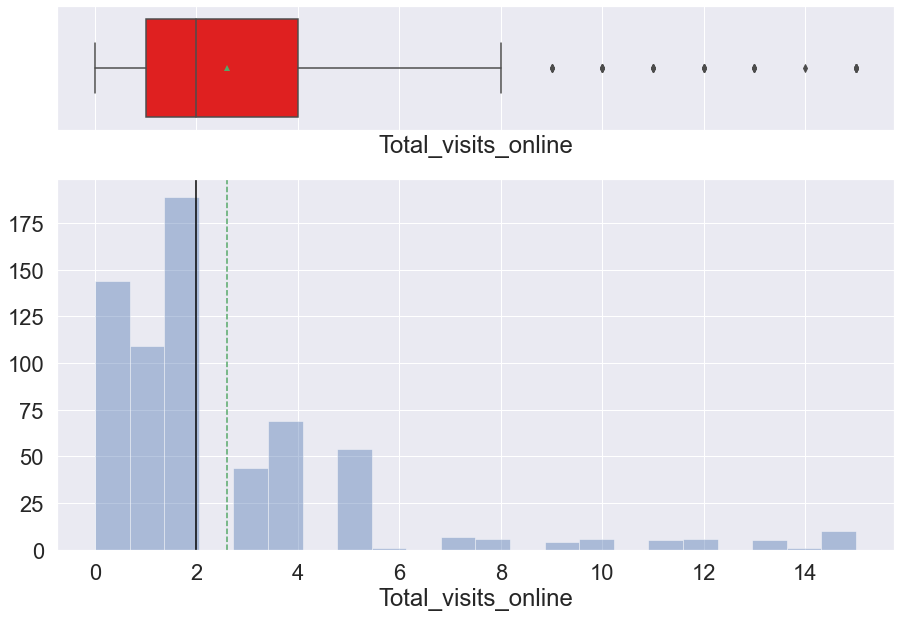




Total_calls_made:
**************************************************


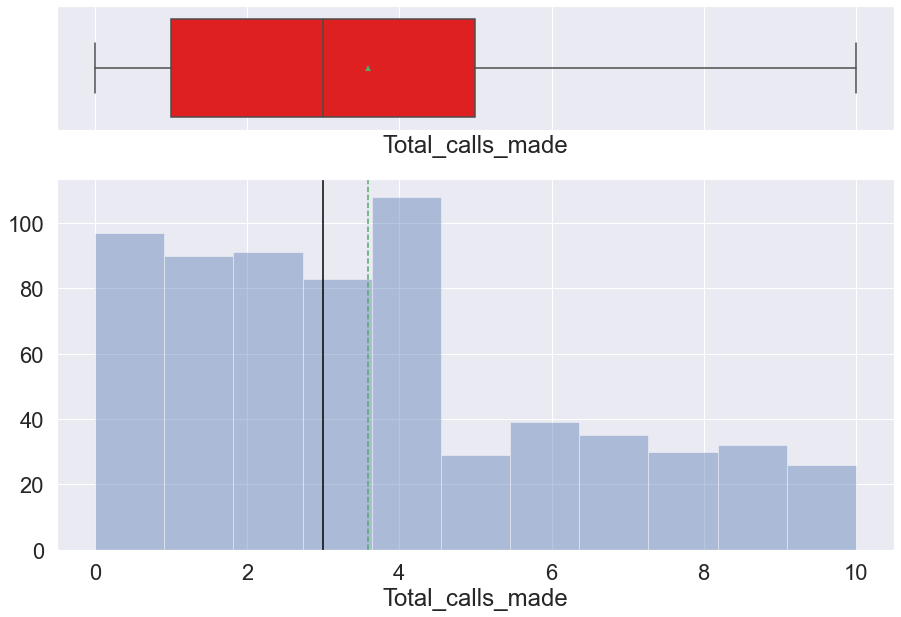

In [19]:
# Iterate through columns and plot histograms and boxplots
for column in all_col:
    print(column+':\n'+'*'*50)
    histogram_boxplot(data[column])
    plt.show()
    print('\n'*2)

***
* `Avg_Credit_Limit` has several outliers, but this is to be expected because income levels and total liability can vary widely which impact the amount of credit banks are willing to extend.
* Half of all customers have an `Avg_Credit_Limit` at or below $18,000.
* `Total_Credit_Cards`  and `Total_visits_online` do not have a lot of variability.
* `Total_visits_online` seems to be the most normally distributed column.
* `Total_visits_online` is right skewed with outliers.
* `Total_calls_made` appears right skewed.
* Only two columns (`Avg_Credit_Limit` and `Total_visits_online`) have outliers.

[[Table of Contents](#Table_of_Contents)]
***

<a id='Bivariate_Analysis'></a>
## Bivariate Analysis

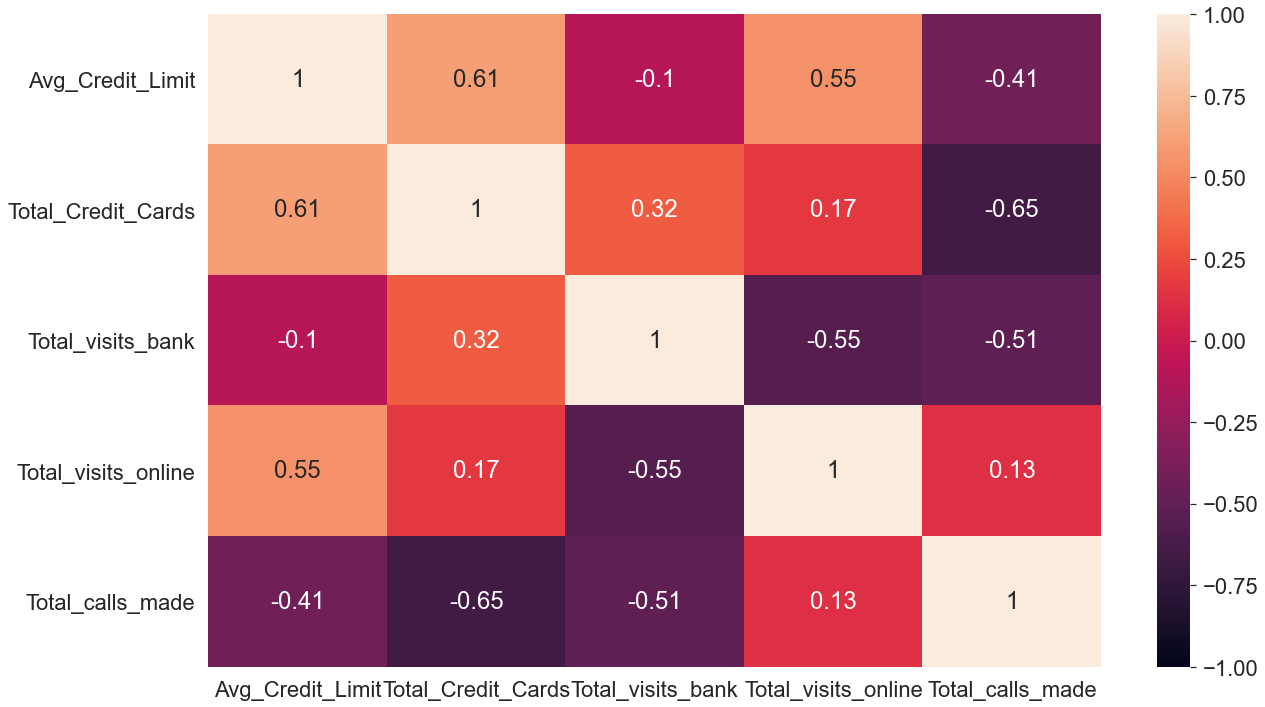

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

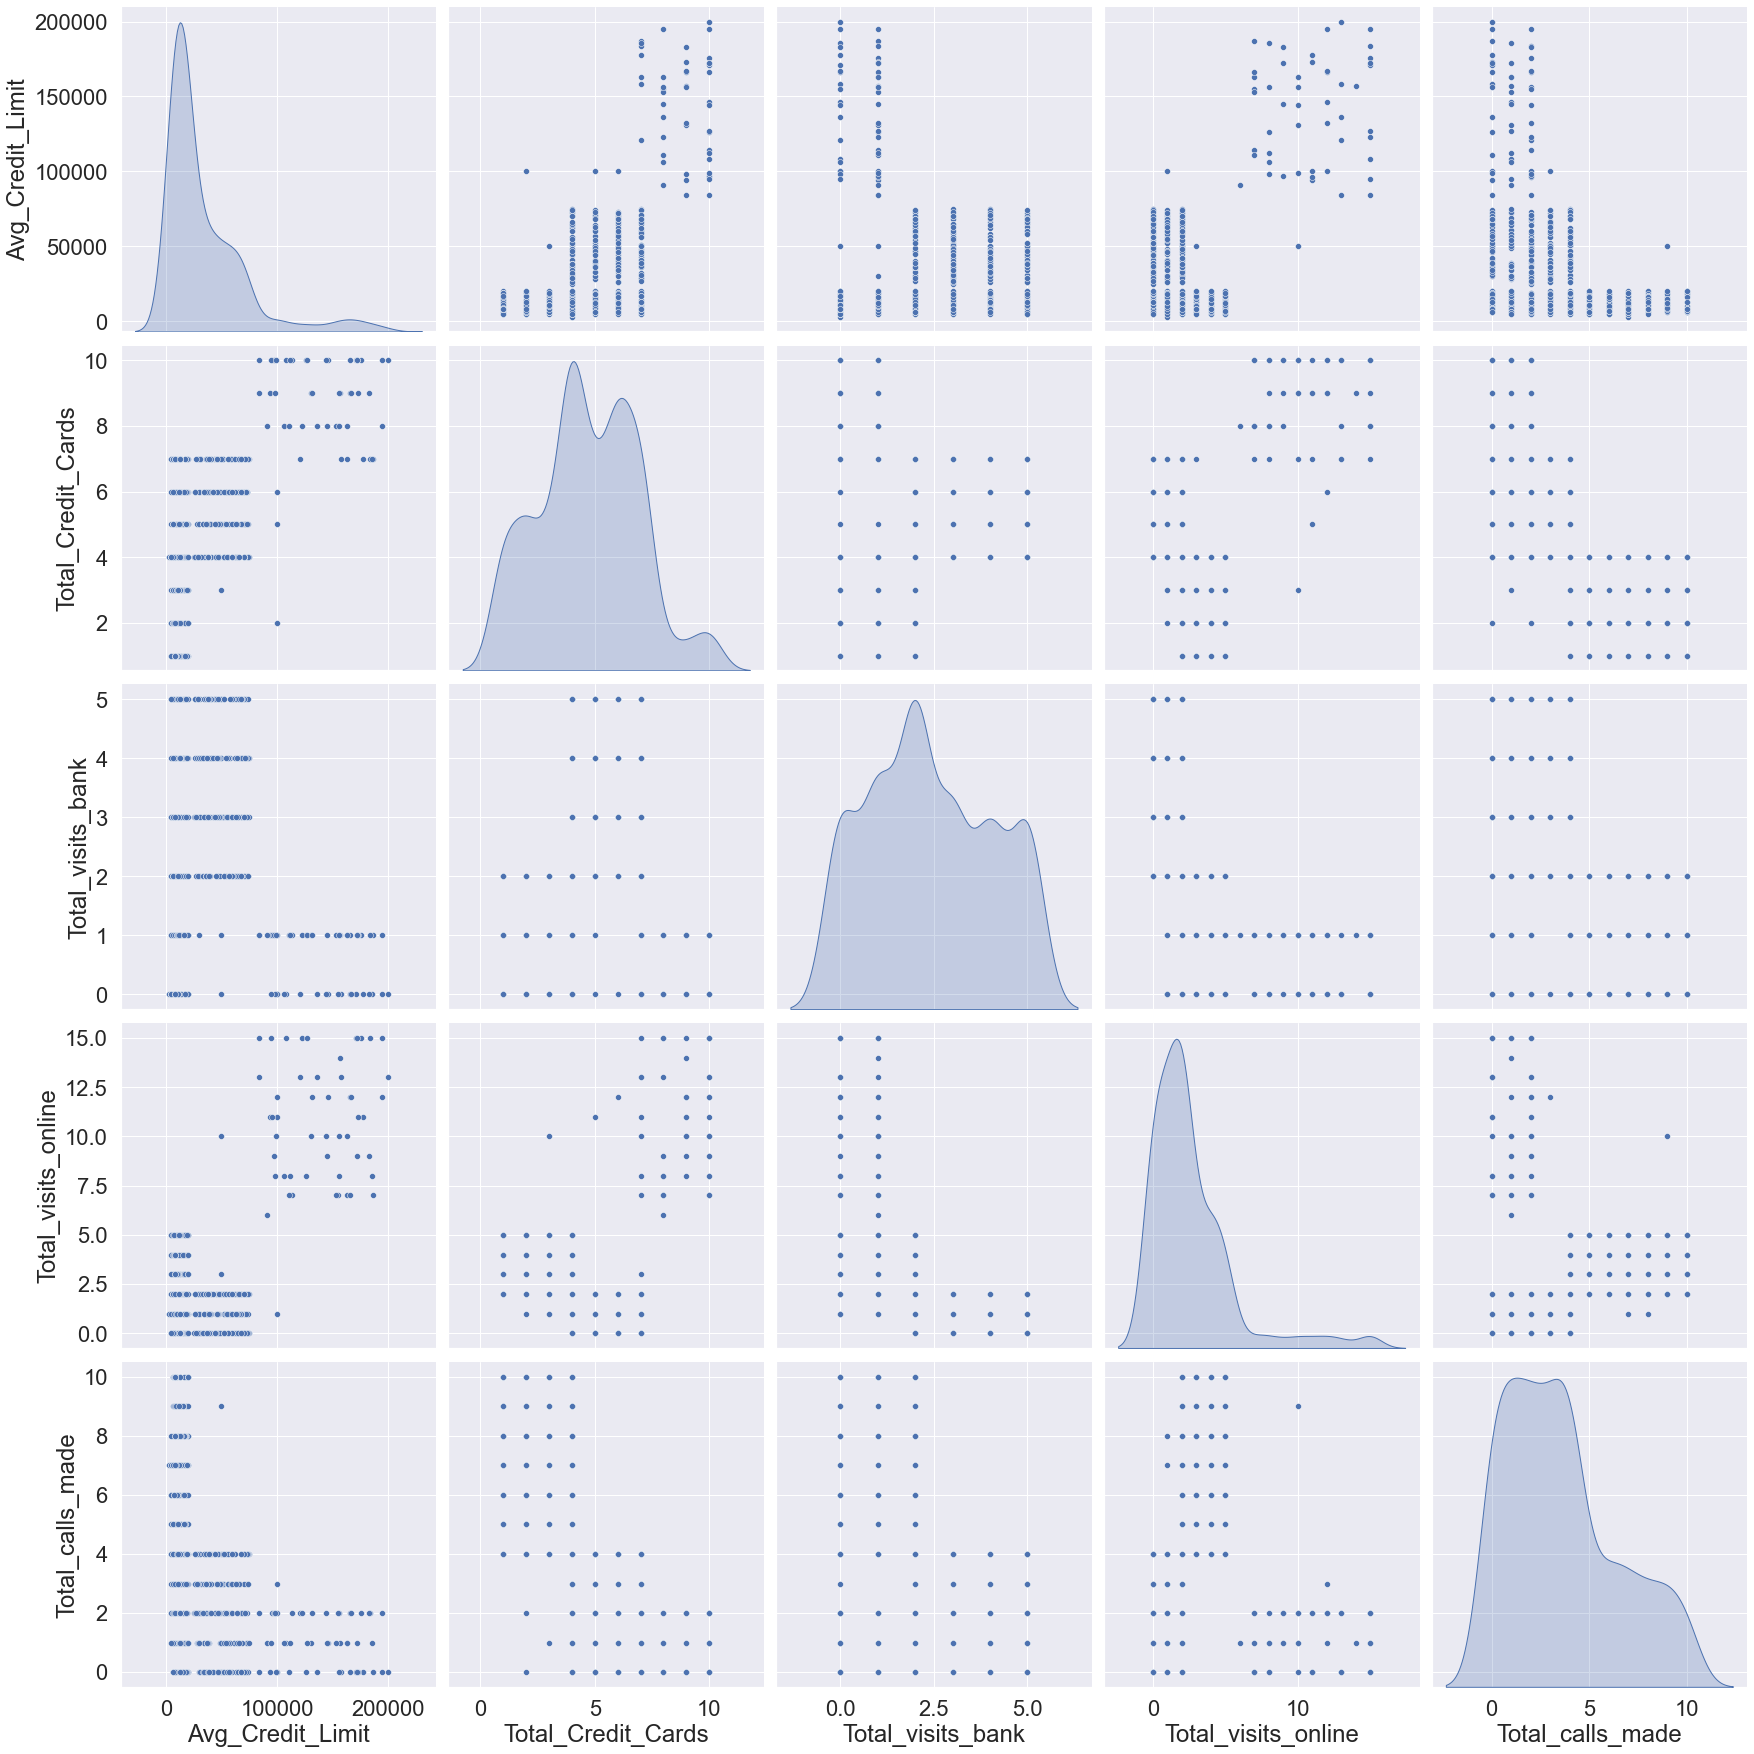

In [21]:
#plt.figure(figsize=(50,50))
sns.pairplot(data, diag_kind="kde", height = 5)

***
* `Avg_Credit_Limit` and `Total_Credit_Cards` have the strongest positive correlation.
* `Total_Credit_Cards` and `Total_calls_made` have the strongest negative correlation.
* If people visit the bank more often they tend not to use online banking or make phone calls.
* As the `Total_visits_bank` increases, `Total_calls_made` and `Total_visits_online` decrease.
* As `Avg_Credit_Limit` increases `Total_visits_online` also tends to increase.
* Customers with a higher number of credit cards tend to visit the bank in person more often and make fewer phone calls to the bank.
* Customers with a higher average credit card limit tend to use online banking more often and make fewer phone calls to the bank.
* Based on the column distributions it looks like the ideal number of clusters will be between 2 and 4.

[[Table of Contents](#Table_of_Contents)]
***

<a id='Initial_Insights'></a>
## Initial Insights

**AllLife plans to use customer profiles to better market to and serve each customer segment. Based on initial exploratory analysis of the data the bank may want to consider the below customer characteristics in any future campaigns.**

* Customers who prefer banking in person compared to customers who call by phone more often.
* Customer who prefer banking online compared to customers who call by phone more often. 
* Characteristics of customers with higher credit limits and total number of credit cards.

**Additional Notes:**
* Customers who call the bank more often tend to have fewer credit cards indicating that more phone calls may be indicative of a customer's dissatisfaction with the bank.
* There may be differences among customers who prefer in person banking, online banking, or calling in by phone.

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Data_Pre-Processing'></a>
# (3) Data Pre-Processing

## Outlier Treatment

* Only two columns have outliers to handle, `Avg_Credit_Limit` and `Total_visits_online`.
* Per the above boxplots the `Avg_Credit_Limit` outliers occur for values above $100,000, which include 39 observations.
* Per the above boxplots the `Total_visits_online` outliers occur for values above 8 online visits.

In [22]:
# Determine percentage of outliers.
online_Outliers = data[data.Total_visits_online > 8] # create dataframe of online outliers
num_online_Outliers = len(online_Outliers) # number of online outliers
observations = data.shape[0]

limitRatio = num_highLimits/observations # Calculte ratio of credit limit outliers
onlineRatio = num_online_Outliers/observations # Calculte ratio of online outliers

print(f'Percentage of outliers for average credit limit: {limitRatio*100:.2f}%')
print(f'Percentage of outliers for online visits: {(onlineRatio*100):.2f}%')

Percentage of outliers for average credit limit: 5.91%
Percentage of outliers for online visits: 5.61%


***
* It is possible that natural variation can explain the outliers, and considering that the percentage of outliers compared to the total number of observations is low, it may be best to not treat outliers.
* Since the data set is so small, it is possible to run the algorithms twice with and without outliers to determine the differences.
* Two ways to treat outliers are to repace values with the mean or with the upper whisker value of the boxplot.
* Considering that these outliers are most likely not erros given the chance of variability for these columns, it is best to replace the outlier values with the mean of the outliers to try and capture more information and less noise.
***

In [23]:
online_Outliers.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,139945.945946,8.675676,0.567568,12.216216,1.378378
std,38128.398534,1.633912,0.502247,2.123089,1.569702
min,50000.000000,3.000000,0.000000,9.000000,0.000000
25%,100000.000000,8.000000,0.000000,10.000000,0.000000
50%,145000.000000,9.000000,1.000000,12.000000,1.000000
75%,172000.000000,10.000000,1.000000,15.000000,2.000000
max,200000.000000,10.000000,1.000000,15.000000,9.000000


In [24]:
highLimits.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,39.000000,39.00000,39.000000,39.000000,39.00000
mean,154205.128205,8.74359,0.589744,10.871795,1.00000
std,26715.045522,1.14059,0.498310,2.948501,0.82717
min,106000.000000,7.00000,0.000000,7.000000,0.00000
25%,131500.000000,8.00000,0.000000,8.000000,0.00000
50%,157000.000000,9.00000,1.000000,11.000000,1.00000
75%,172500.000000,10.00000,1.000000,13.000000,2.00000
max,200000.000000,10.00000,1.000000,15.000000,2.00000


***
* The mean value of the outliers for `Total_visits_online` is 12.
* The mean value of the outliers for `Avg_Credit_Limit` is $154,205
***

In [25]:
#replace highest values with the mean of outliers
df_no_Outliers = data.copy()

for i in range(660):
    if df_no_Outliers['Avg_Credit_Limit'][i] > 100000:
        df_no_Outliers['Avg_Credit_Limit'][i] = 154205

for i in range(660):
    if df_no_Outliers['Total_visits_online'][i] > 8:
        df_no_Outliers['Total_visits_online'][i] = 12

**Compare means of data frame with and without outliers**

In [26]:
df_no_Outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.234848,37074.542612,3000.0,10000.0,18000.0,48000.0,154205.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.593939,2.853312,0.0,1.0,2.0,4.0,12.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


***
* The means did not change much.
***

## Duplicate Treatment

In [28]:
# Check duplicates of data frame without outliers
no_outliers_duplicateRows = df_no_Outliers[df_no_Outliers.duplicated(keep = 'first')]
print(f'There are {len(no_outliers_duplicateRows)} duplicate rows.')
no_outliers_duplicateRows

There are 22 duplicate rows.


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


***
* This data frame has the same duplicates plus 11 more from the outlier treatment.
* This indicates that the duplicate values may be coincidental and not errors. As such, I will leave the duplicates in the data frame.
***

## Re-run EDA

Avg_Credit_Limit:
**************************************************


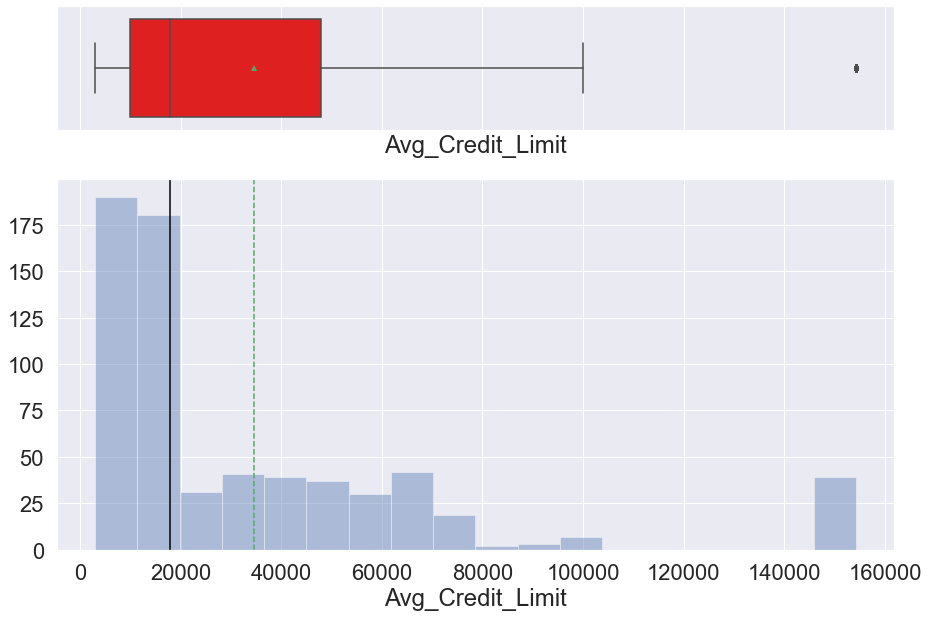




Total_visits_online:
**************************************************


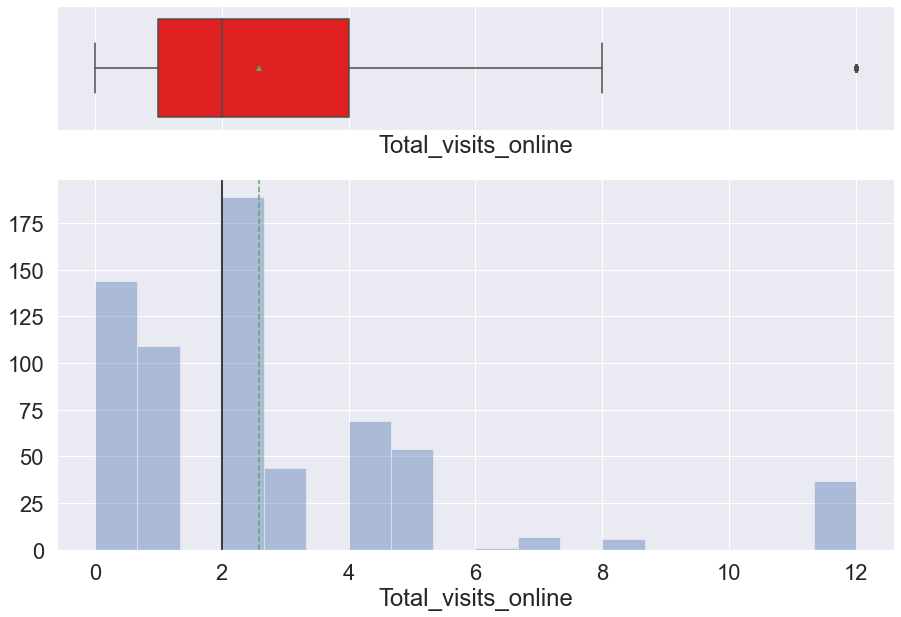

In [29]:
# Iterate through columns and plot histograms and boxplots

print('Avg_Credit_Limit'+':\n'+'*'*50)
histogram_boxplot(df_no_Outliers['Avg_Credit_Limit'])
plt.show()
    
print('\n'*2)

print('Total_visits_online'+':\n'+'*'*50)
histogram_boxplot(df_no_Outliers['Total_visits_online'])
plt.show()

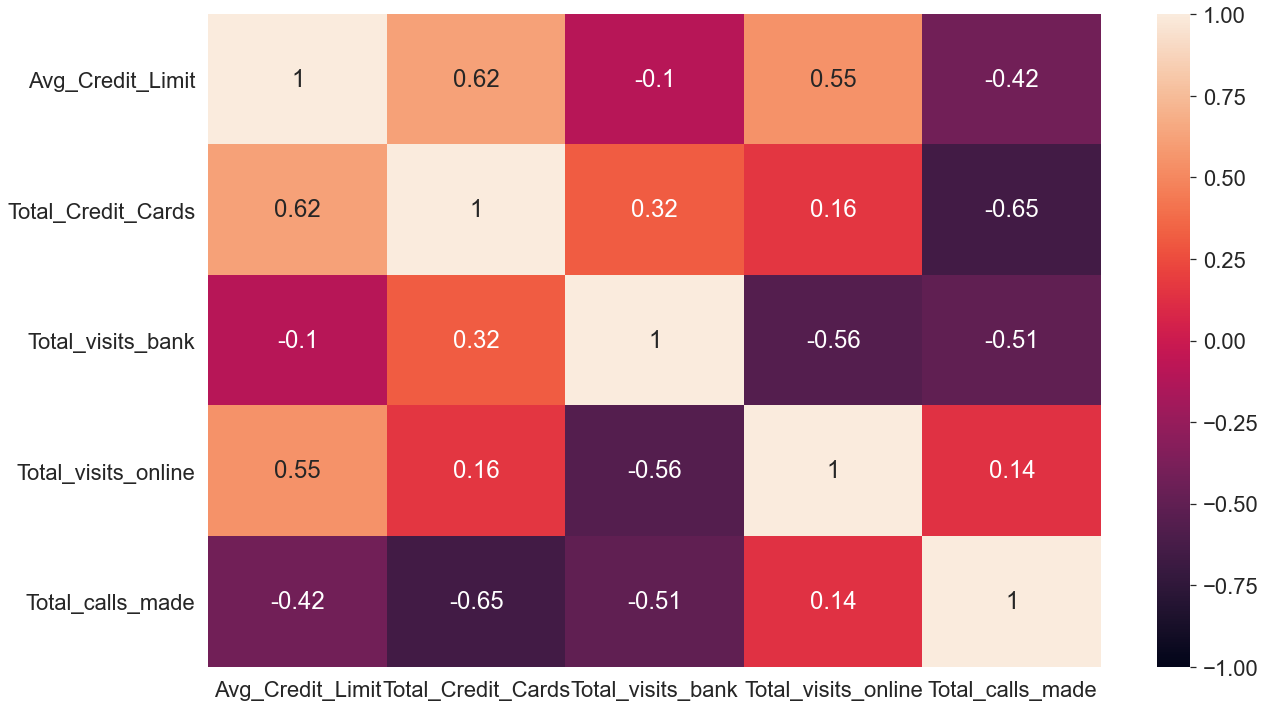

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df_no_Outliers.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

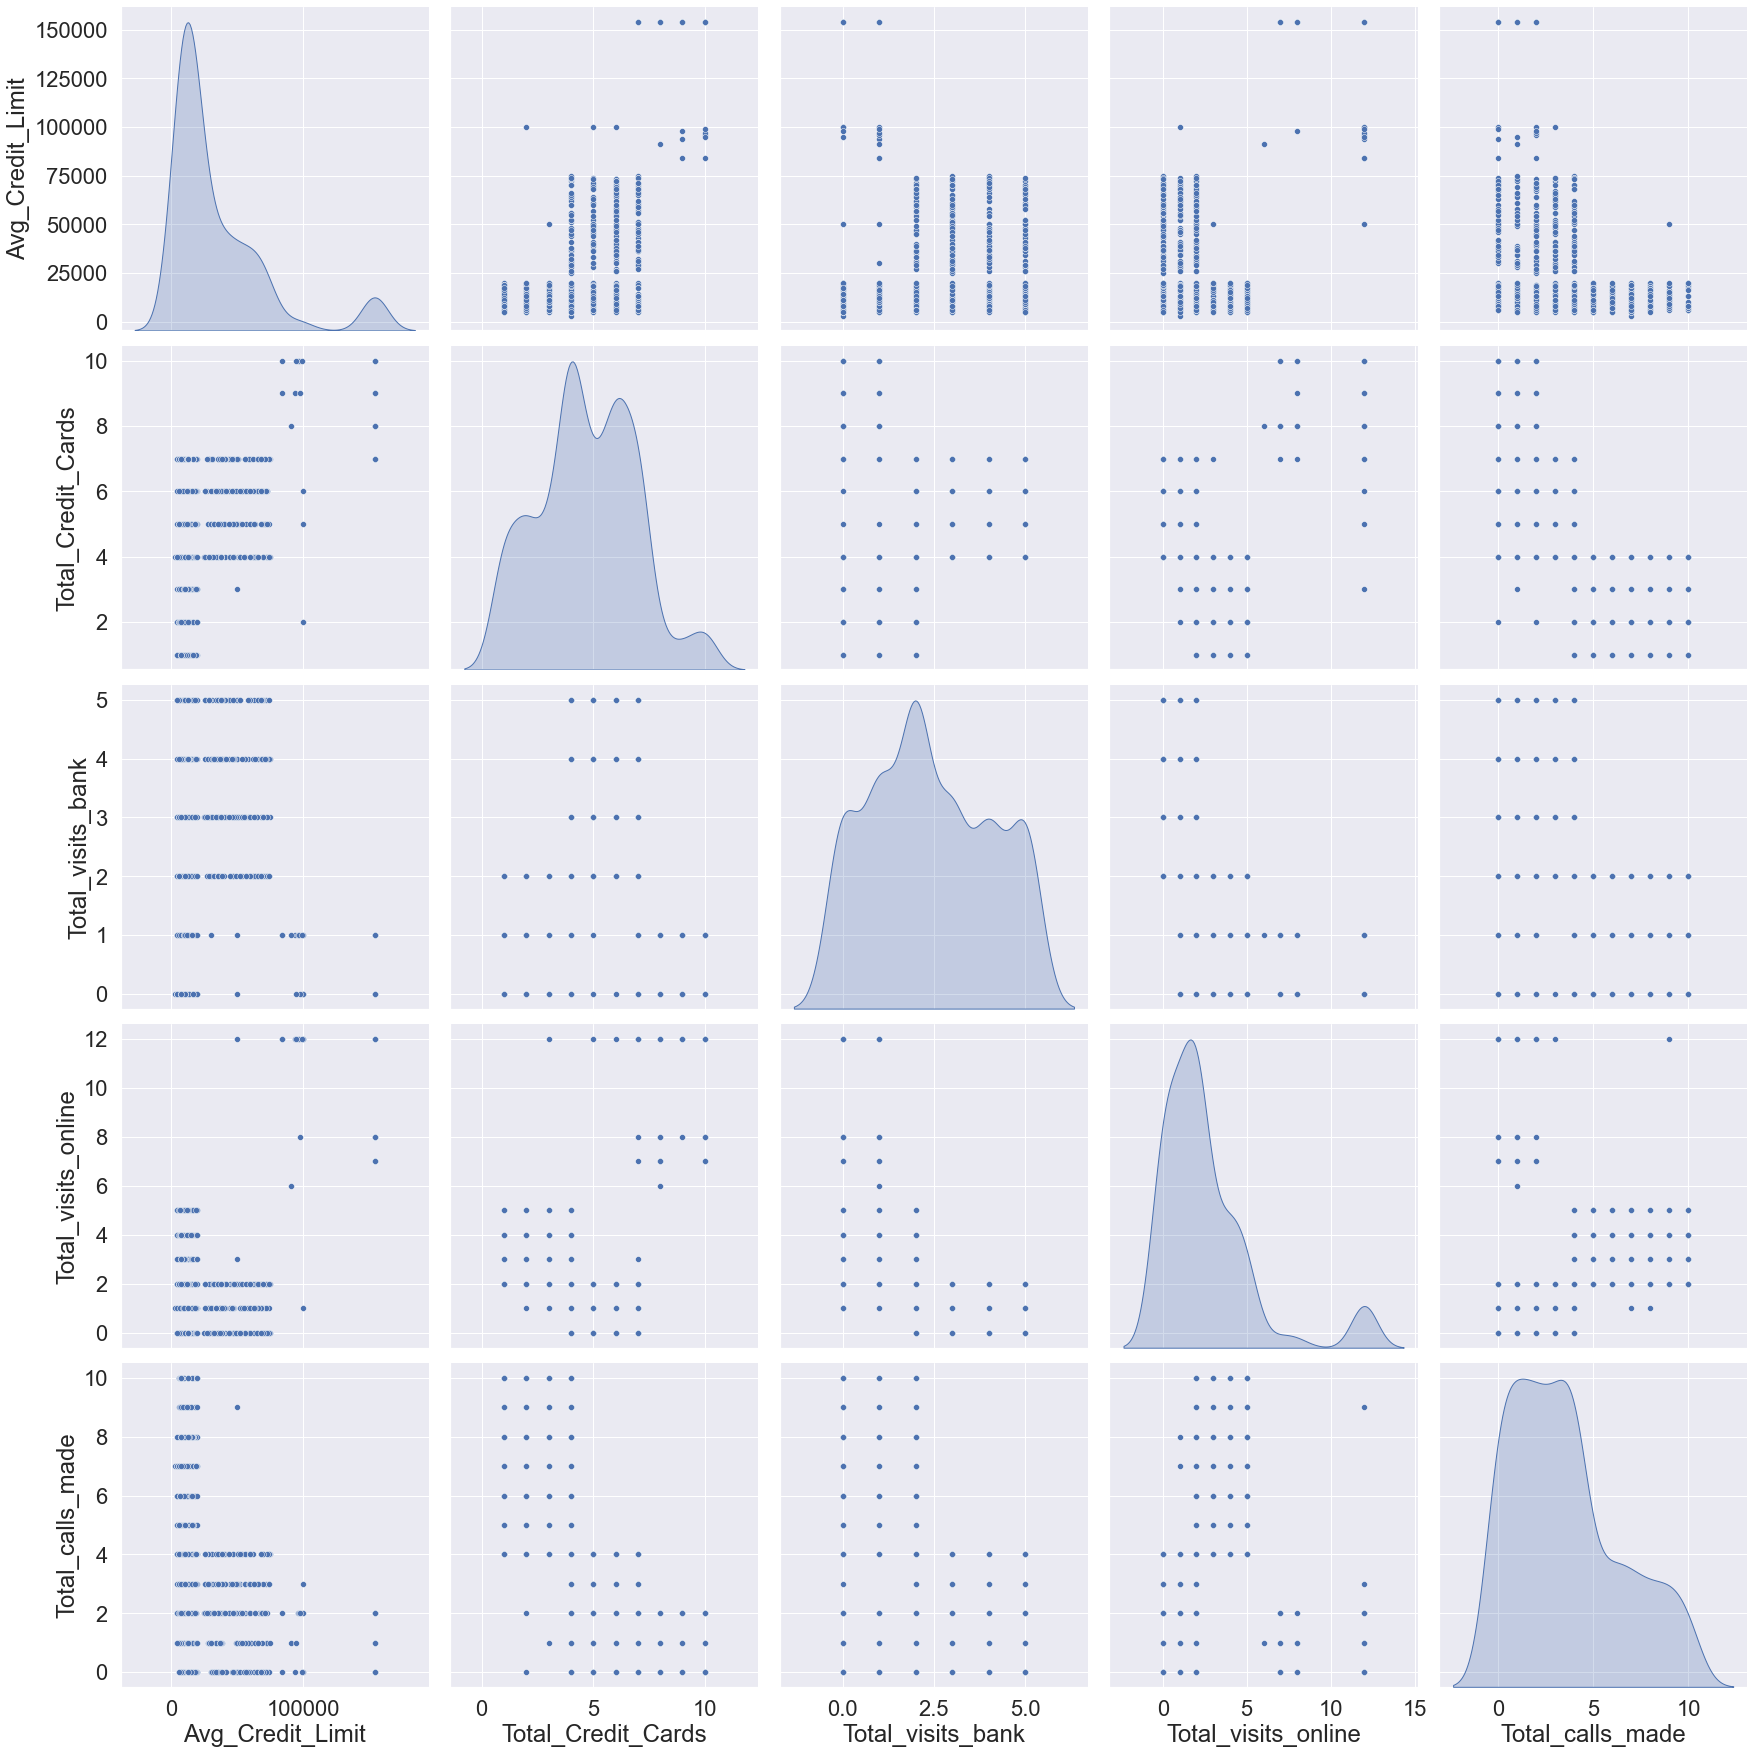

In [31]:
#plt.figure(figsize=(50,50))
sns.pairplot(df_no_Outliers, diag_kind="kde", height = 5)

***
* EDA results do not appear to have changed.

[[Table of Contents](#Table_of_Contents)]
***

<a id='K-means_Clustering'></a>
# (4) K-means Clustering

**With Outliers**

In [32]:
# Scaling the data set before clustering
kDF = data.copy()
scaler=StandardScaler()
subsetK=kDF.copy()
subsetK_scaled=scaler.fit_transform(subsetK)

In [33]:
#Creating a dataframe from the scaled data above
subsetK_scaled_df=pd.DataFrame(subsetK_scaled,columns=subsetK.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9259033830489658
Number of Clusters: 8 	Average Distortion: 0.8921459284466516


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

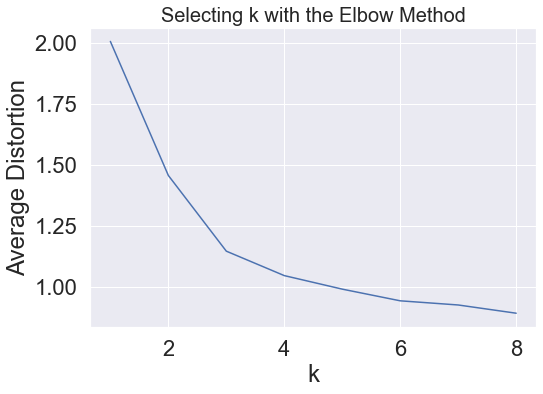

In [34]:
# Create elbow curve
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subsetK_scaled_df)
    prediction=model.predict(subsetK_scaled_df)
    distortion=sum(np.min(cdist(subsetK_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subsetK_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)
# show elbow curve
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

***
* The appropriate value of k from the elbow curve seems to be 2 or 3, compared to 2 to 4 clusters from the EDA.
***

In [79]:
# Calculate silhouette scores
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subsetK_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subsetK_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43418833714796445)
For n_clusters = 3, silhouette score is 0.5411228112448502)
For n_clusters = 4, silhouette score is 0.36885590325418505)
For n_clusters = 5, silhouette score is 0.27664876307197045)
For n_clusters = 6, silhouette score is 0.26045419121292834)
For n_clusters = 7, silhouette score is 0.25355279619759297)
For n_clusters = 8, silhouette score is 0.22937952343887894)
For n_clusters = 9, silhouette score is 0.2128844249433547)


***
* From silhouette score, it seems that 3 is good value of k which agrees with the elbow curve.
***

**Visualized silhouette scores for top 3 k values for clusters**

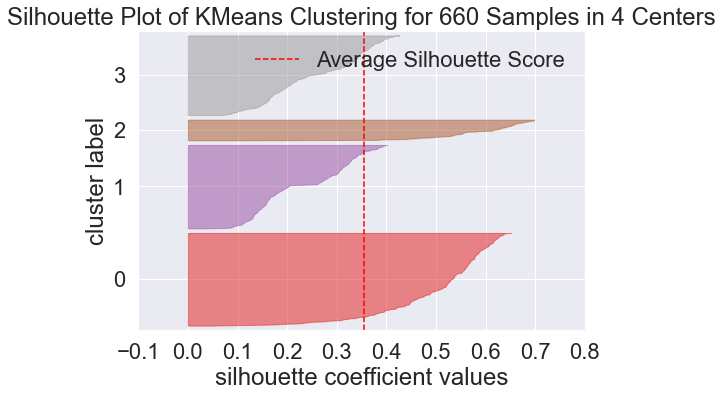

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subsetK_scaled_df)    
visualizer.show()

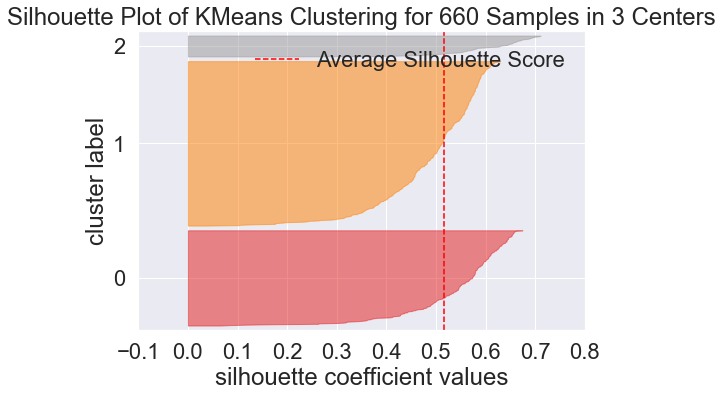

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subsetK_scaled_df)    
visualizer.show()

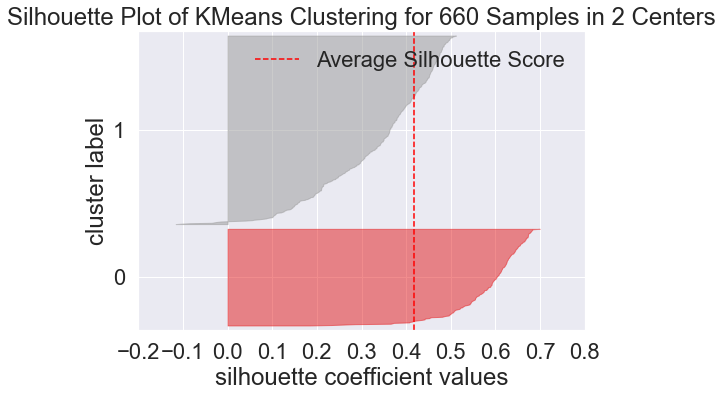

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subsetK_scaled_df)    
visualizer.show()

***
* Creating two clusters has some observations with negative silhouette coefficients which indicates two is not a good choice for the k value.
* Three and four clusters are both good options, however three has an average silhoette coefficient that is closer to one making three clusters the best value for k.
***

**Without Outliers**

In [39]:
# Scaling the data set before clustering
subset_no_outliers = df_no_Outliers.copy()
subset_scaled_no_outliers=scaler.fit_transform(subset_no_outliers)

In [40]:
#Creating a dataframe from the scaled data above
subset_scaled_no_outliers_df=pd.DataFrame(subset_scaled_no_outliers,columns=subset_no_outliers.columns)

Number of Clusters: 1 	Average Distortion: 2.0153182562100787
Number of Clusters: 2 	Average Distortion: 1.4642874057146238
Number of Clusters: 3 	Average Distortion: 1.1316596793114428
Number of Clusters: 4 	Average Distortion: 1.0319199253072318
Number of Clusters: 5 	Average Distortion: 0.9764995624169303
Number of Clusters: 6 	Average Distortion: 0.9274790003987202
Number of Clusters: 7 	Average Distortion: 0.8934614904951922
Number of Clusters: 8 	Average Distortion: 0.8848996561003936


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

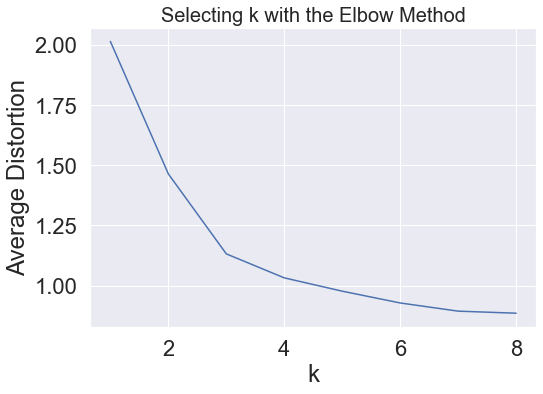

In [41]:
# Creating elbow cureve
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_no_outliers_df)
    prediction=model.predict(subset_scaled_no_outliers_df)
    distortion=sum(np.min(cdist(subset_scaled_no_outliers_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_no_outliers_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

    # Show elbow curve
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [42]:
# Calculate silhouette scores
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_no_outliers_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_no_outliers_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41825804838809333)
For n_clusters = 3, silhouette score is 0.5209242395439412)
For n_clusters = 4, silhouette score is 0.360350887193723)
For n_clusters = 5, silhouette score is 0.2759847388799383)
For n_clusters = 6, silhouette score is 0.26096543037837927)
For n_clusters = 7, silhouette score is 0.25455135307285953)
For n_clusters = 8, silhouette score is 0.24000743653524426)
For n_clusters = 9, silhouette score is 0.22313471560551948)


**Visualized silhouette scores for data frame without outliers**

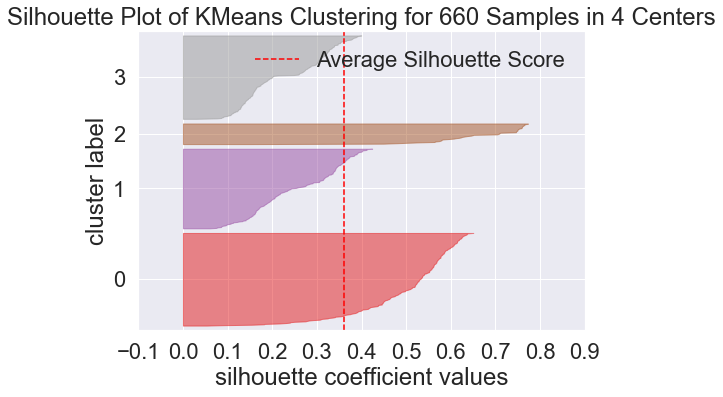

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_no_outliers_df)    
visualizer.show()

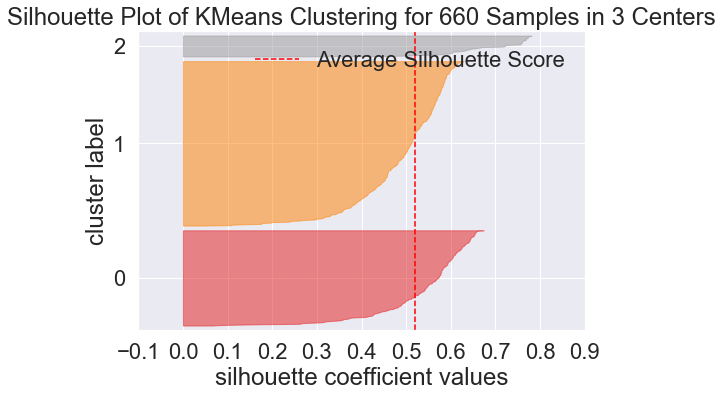

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_no_outliers_df)    
visualizer.show()

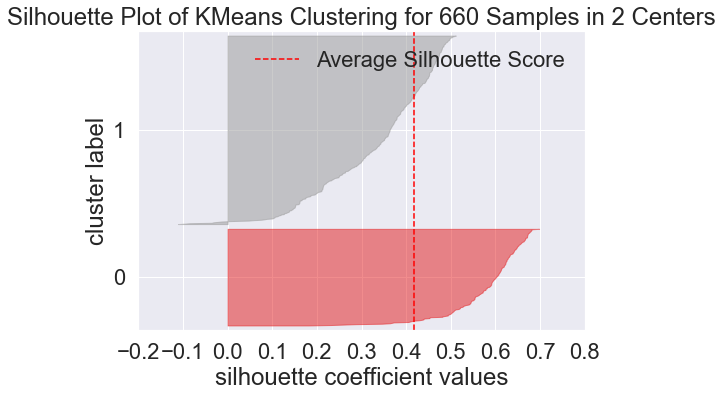

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_no_outliers_df)    
visualizer.show()

***
* Outlier treatment does not seem to affect the best k value for the number of clusters.
* It is safe to stop analyisis of the outlier treated data frame.
***

**Create 3 Clusters**

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subsetK_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [47]:
kDF['K_means_segments'] = kmeans.labels_ # add column for cluster labels
subsetK_scaled_df['K_means_segments'] = kmeans.labels_ # add column for cluster labels

In [48]:
cluster_profile = kDF.groupby('K_means_segments').mean() # find the mean of each cluster

In [49]:
# count the number of observations in each cluster
cluster_profile['count_in_each_segments'] = kDF.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [50]:
# display cluster profiles
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0) #highlight the max value in each column

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<AxesSubplot:xlabel='K_means_segments'>

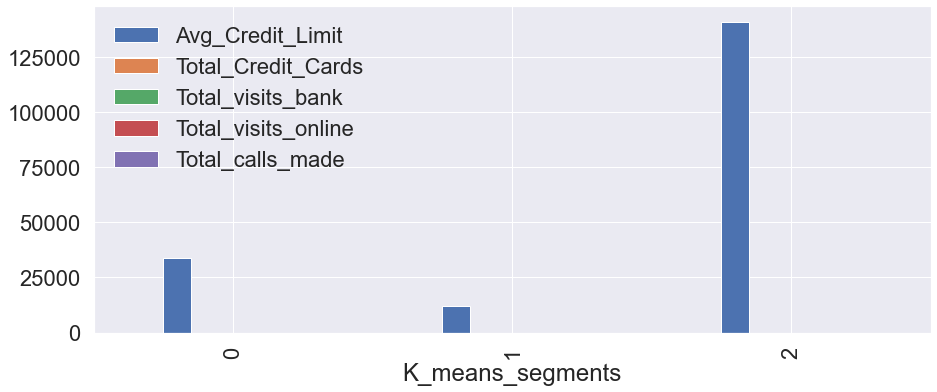

In [51]:
kDF.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='K_means_segments'>

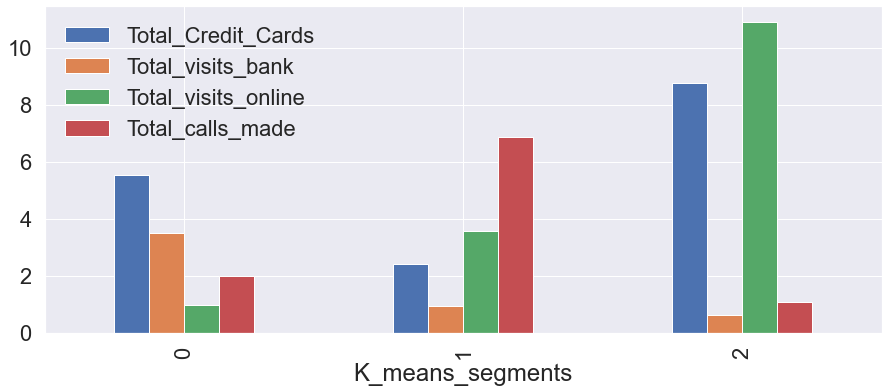

In [52]:
kDF_no_limit = kDF.drop(['Avg_Credit_Limit'],axis=1,inplace=False)
kDF_no_limit.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

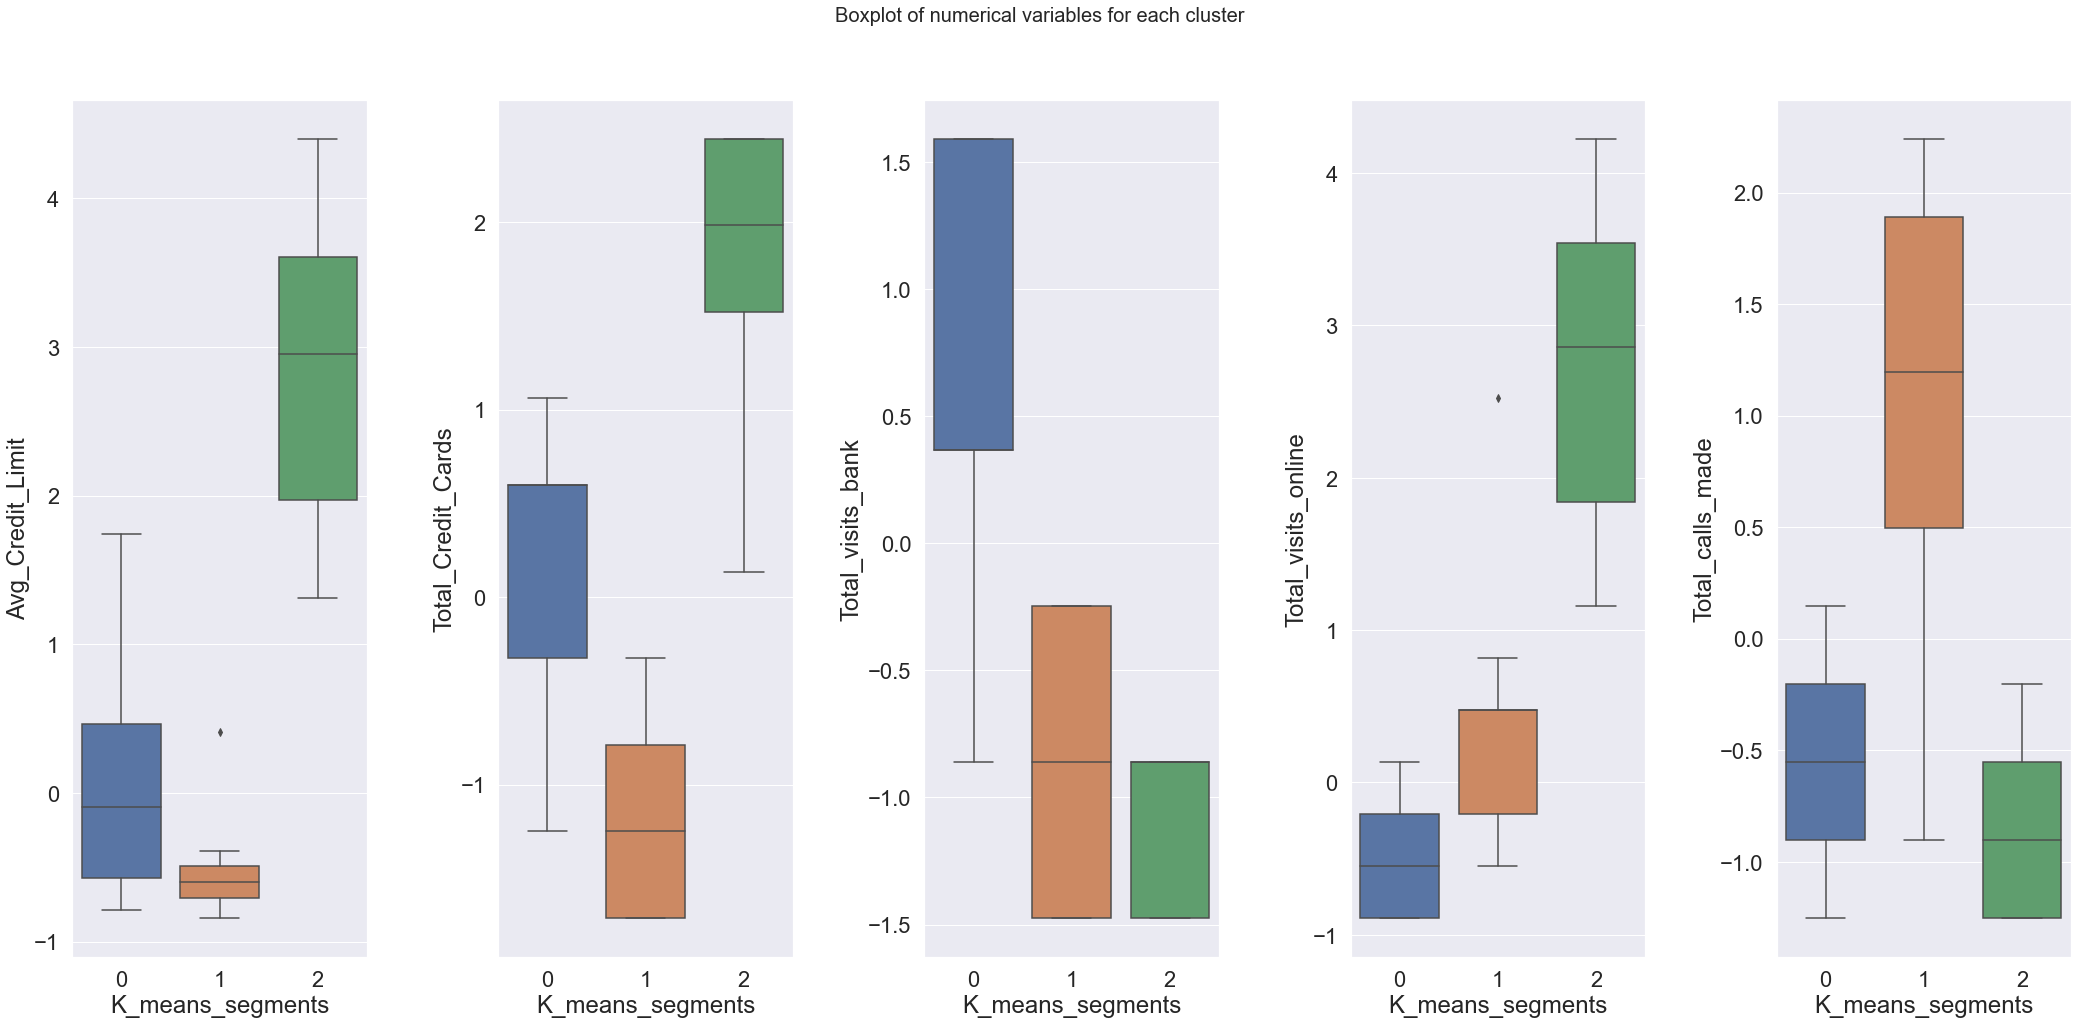

In [53]:
fig, axes = plt.subplots(1, 5,  figsize=(30, 15))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subsetK_scaled_df[all_col[counter]],x=subsetK_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

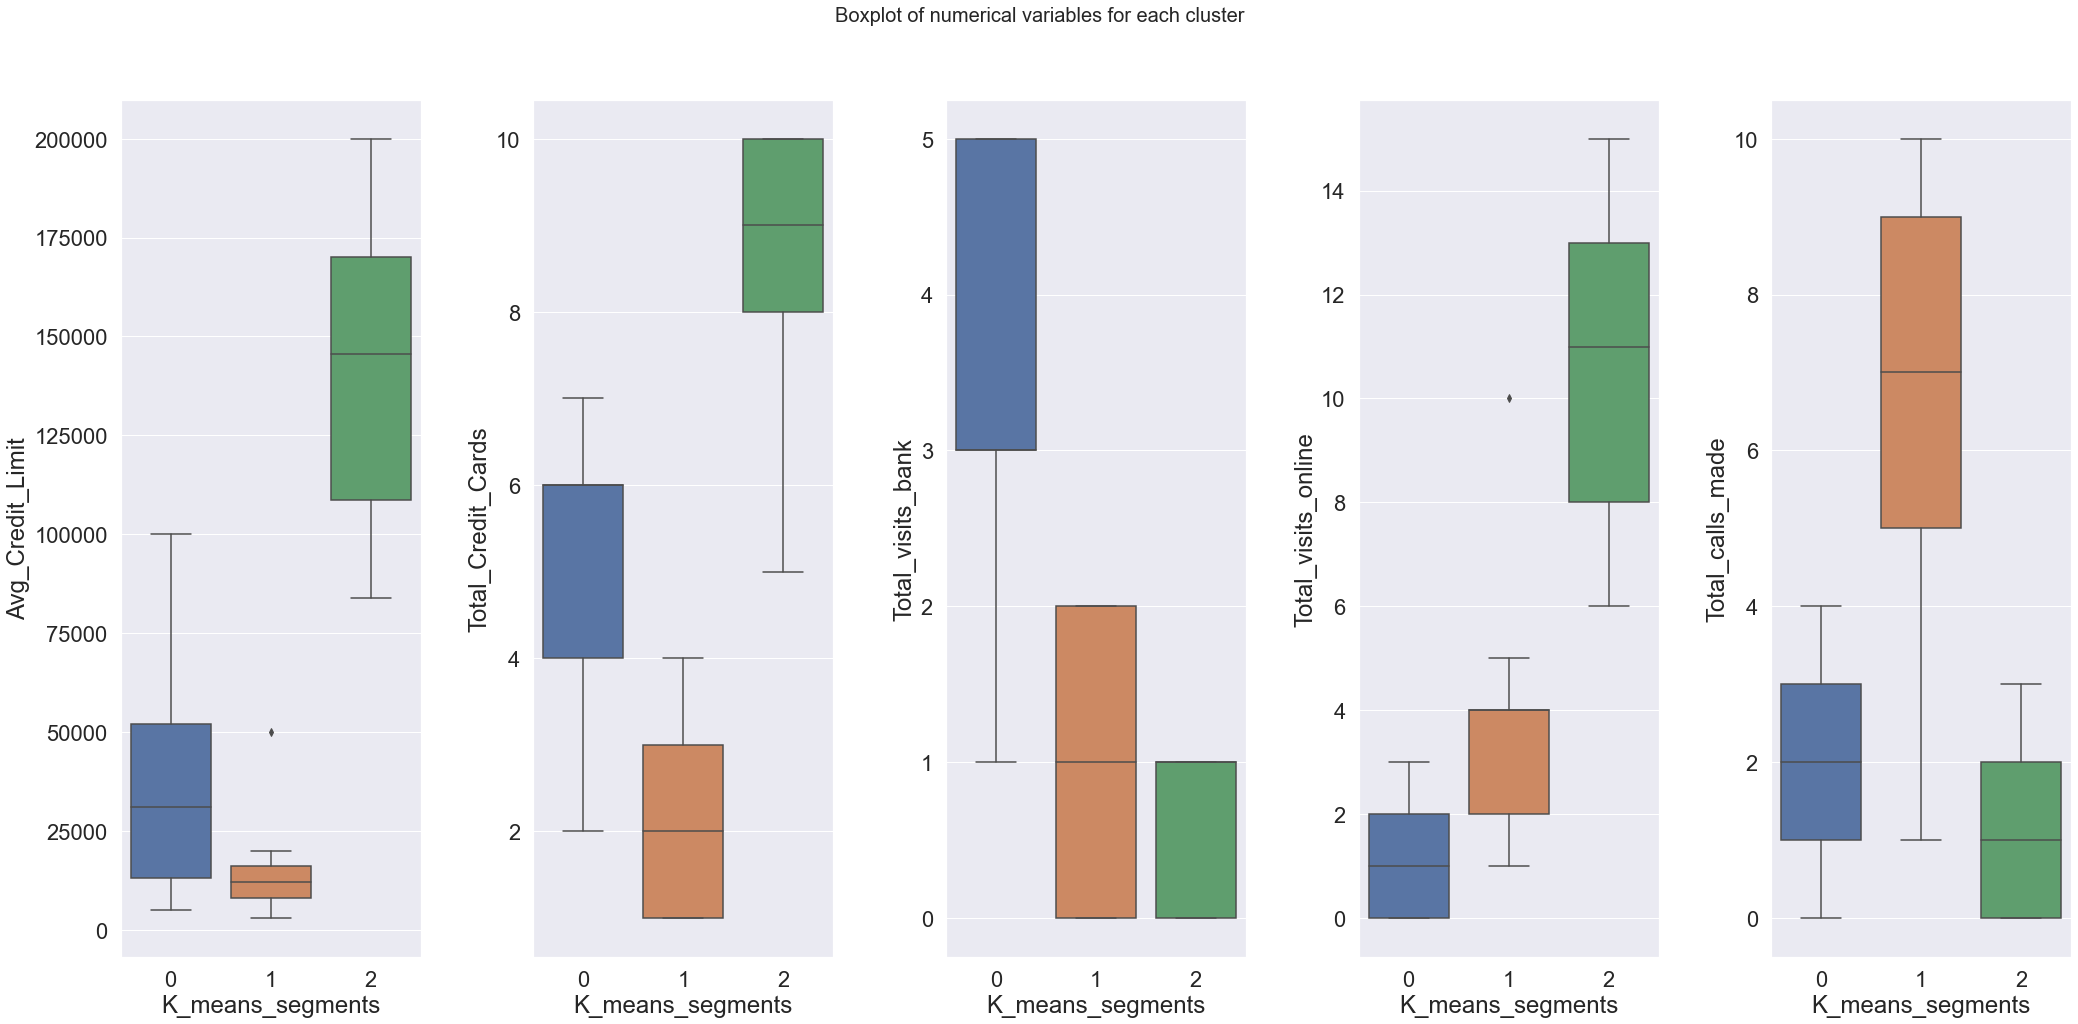

In [54]:
fig, axes = plt.subplots(1, 5,  figsize=(30, 15))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=kDF[all_col[counter]],x=kDF['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

***
* Cluster 0 has the most observations at 386, and Cluster 2 has the least at 50.
* Cluster 2 has the largest credit limits, the most credit cards, the lowest phone calls, and the highest online bank visits. 
* Cluster 1 has the most phone calls and the lowest credit limit and nuumber of credit cards.
* The boxplot distributions for the scaled and unscaled data looks the same.

[[Table of Contents](#Table_of_Contents)]
***

<a id='Hierarchical_Clustering'></a>
# (5) Hierarchical Clustering

In [55]:
# Scaling the data set before clustering
hcDF = data.copy()
scaler=StandardScaler()
subsetHC=hcDF.copy()
subsetHC_scaled=scaler.fit_transform(subsetHC)

In [56]:
#Creating a dataframe from the scaled data above
subsetHC_scaled_df=pd.DataFrame(subsetHC_scaled,columns=subsetHC.columns)

**Determine Cophenetic Correlations**

In [57]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

# Iterate through linkage methods and distance measures 
# to determine which combination results in the highest cophentic correlation
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subsetHC_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subsetHC_scaled_df))
        print(f'Cophenetic correlation for distance metric: {dm}, and linkage method: {lm} is {c:.2f}')
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
print('*'*90)
print(f'Highest cophenetic correlation is {high_cophenet_corr:.2f}, which is obtinaed with {high_dm_lm[0]} distance metric and {high_dm_lm[1]} linkage method')

Cophenetic correlation for distance metric: euclidean, and linkage method: single is 0.74
Cophenetic correlation for distance metric: euclidean, and linkage method: complete is 0.86
Cophenetic correlation for distance metric: euclidean, and linkage method: average is 0.90
Cophenetic correlation for distance metric: euclidean, and linkage method: weighted is 0.89
Cophenetic correlation for distance metric: chebyshev, and linkage method: single is 0.74
Cophenetic correlation for distance metric: chebyshev, and linkage method: complete is 0.85
Cophenetic correlation for distance metric: chebyshev, and linkage method: average is 0.90
Cophenetic correlation for distance metric: chebyshev, and linkage method: weighted is 0.89
Cophenetic correlation for distance metric: mahalanobis, and linkage method: single is 0.71
Cophenetic correlation for distance metric: mahalanobis, and linkage method: complete is 0.54
Cophenetic correlation for distance metric: mahalanobis, and linkage method: average

In [58]:
linkage_methods = ['centroid', 'median','ward']
dm = 'euclidean'
high_cophenet_corr = 0
high_dm_lm = [0,0]

# Iterate through linkage methods and determine which results in the highest cophentic correlation
for lm in linkage_methods:
    Z = linkage(subsetHC_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subsetHC_scaled_df))
    print(f'Cophenetic correlation for distance metric: euclidean, and linkage method: {lm} is {c:.2f}')
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*90)
print(f'Highest cophenetic correlation is {high_cophenet_corr:.2f}, which is obtinaed with {high_dm_lm[0]} distance metric and {high_dm_lm[1]} linkage method')

Cophenetic correlation for distance metric: euclidean, and linkage method: centroid is 0.89
Cophenetic correlation for distance metric: euclidean, and linkage method: median is 0.89
Cophenetic correlation for distance metric: euclidean, and linkage method: ward is 0.74
******************************************************************************************
Highest cophenetic correlation is 0.89, which is obtinaed with euclidean distance metric and centroid linkage method


***
* Based on the cophenetic correlations the best linkage methods are average and centroid, and the best distance measure is euclidean.
***

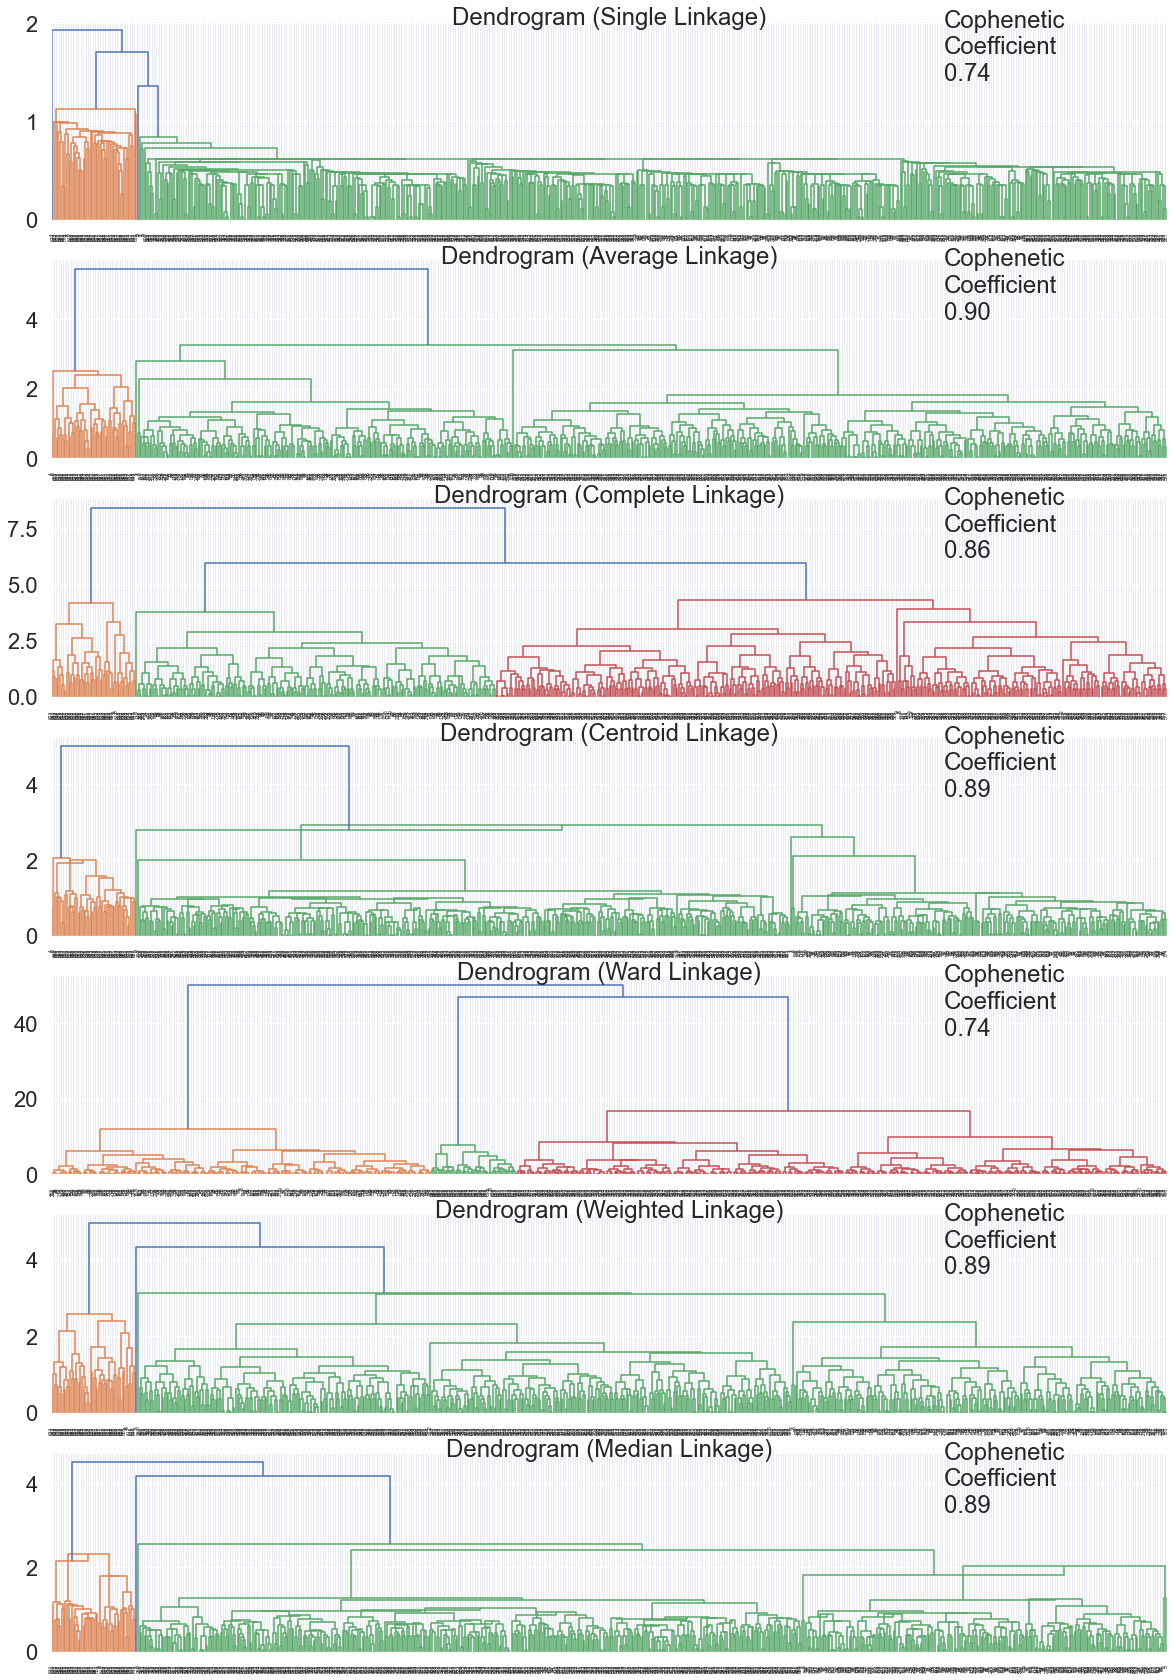

In [59]:
# List of all linkage methods to check
methods = [ 'single',
            'average', 
            'complete',
            'centroid',
            'ward',
            'weighted',
            'median']

# Create lists to save results of coph calculations
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(20, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subsetHC_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)',
                    y = 0.95)
    coph_corr, coph_dist = cophenet(Z, pdist(subsetHC_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.70),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

In [60]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,average,0.897708
2,complete,0.859973
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175
6,median,0.889380


***
* The denograms for the Complete and Ward linkage methods show the clearest, most distinct clusters at three each. This agrees with the number of clusters found by the k-means algorithm
* The Complete method has a higher cophenetic correlation than the Ward method of .86
* The Average linkage method has the highest cophenetic coefficient at .90
* Centroid, Weighted, and Median methods have the next highest coefficients at .89 each
* The cluster splits for Complete and Average linkage methods are very similar
* Since the Complete linkage method has a higher cophenetic coefficient than the Ward method, that algorithm will be used to fit the data
***

**Create three clusters using the Complete linkage method with euclidian distance measure**

In [71]:
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')
HCmodel.fit(subsetHC_scaled_df)
subsetHC_scaled_df['HC_Clusters'] = HCmodel.labels_

In [62]:
hcDF['HC_Clusters'] = HCmodel.labels_ # add column of cluster labels to data frame

In [63]:
cluster_profile = hcDF.groupby('HC_Clusters').mean()# caluclate mean of clusters

In [64]:
cluster_profile['count_in_each_segments'] = hcDF.groupby('HC_Clusters')['Total_Credit_Cards'].count().values # count observations in each cluster

In [65]:
# display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


<AxesSubplot:xlabel='HC_Clusters'>

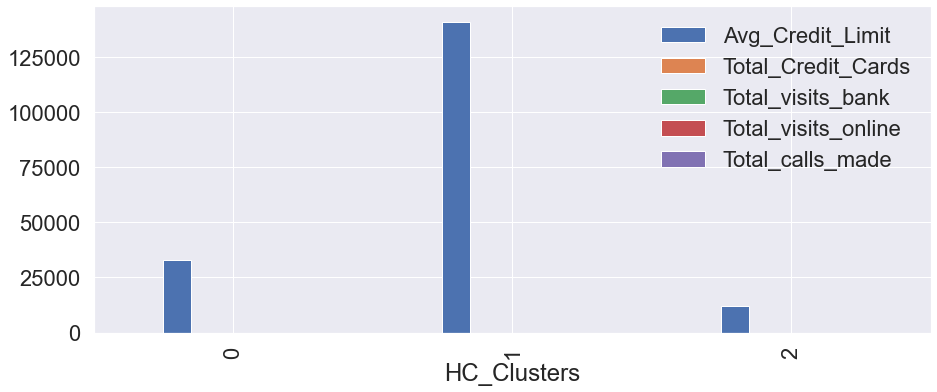

In [66]:
hcDF.groupby('HC_Clusters').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='HC_Clusters'>

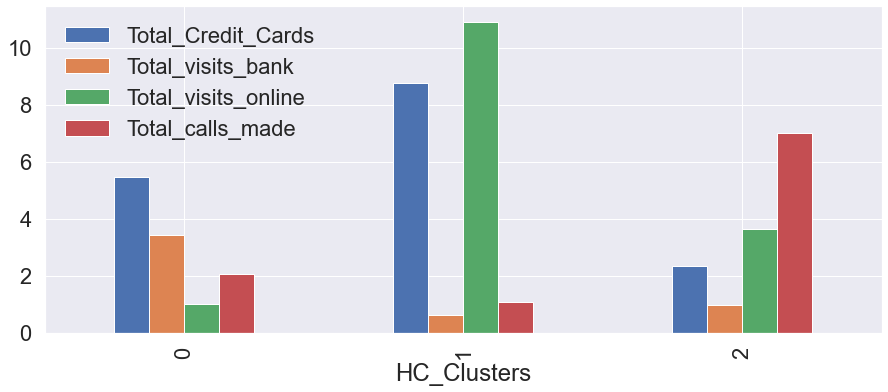

In [67]:
# Graph histogram withour credit limit
hcDF_no_limit = hcDF.drop(['Avg_Credit_Limit'],axis=1,inplace=False)
hcDF_no_limit.groupby('HC_Clusters').mean().plot.bar(figsize=(15,6))

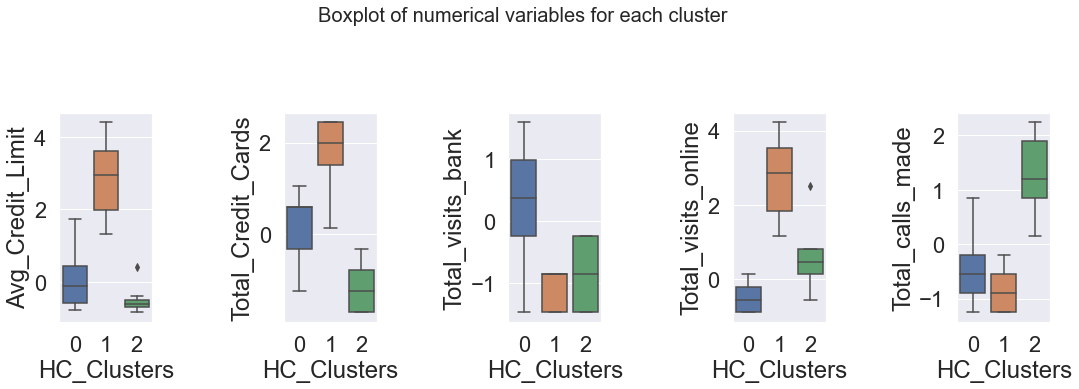

In [68]:
# Graph cluster boxplots of scaled data frame
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subsetHC_scaled_df[all_col[counter]],x=subsetHC_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

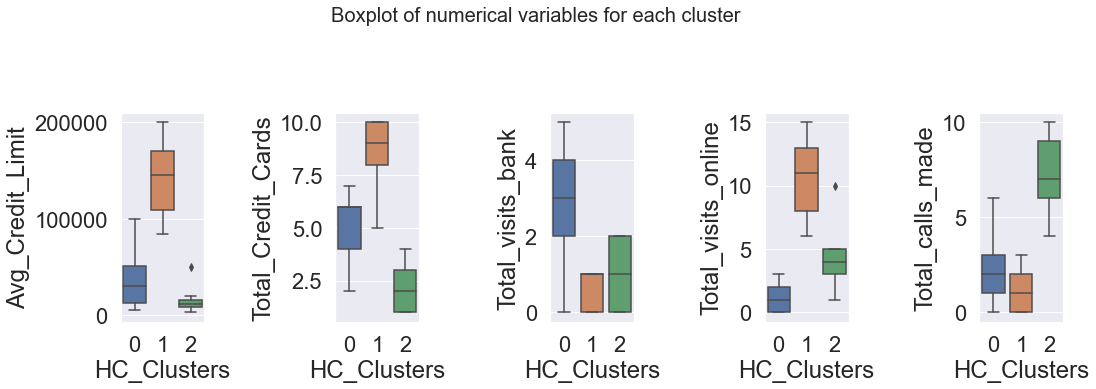

In [69]:
# Graph cluster boxplots of unscaled data frame
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=hcDF[all_col[counter]],x=hcDF['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

***
* Cluster 0 has the most observations at 397 and Cluster 1 has the least at 50.
* Cluster 1 has the largest credit limits, number of credit cards, and online bank visits as well as the lowest phone calls made.
* Cluster 2 has the most phone calls and the lowest credit limit and number of credit cards.
* The boxplot distributions for the scaled and unscaled data looks the same.

[[Table of Contents](#Table_of_Contents)]
***

<a id='Compare_Clustering_Algorithms'></a>
# (6) Compare Clustering Algorithms

**Bar graph of average credit limits**

<AxesSubplot:xlabel='K_means_segments'>

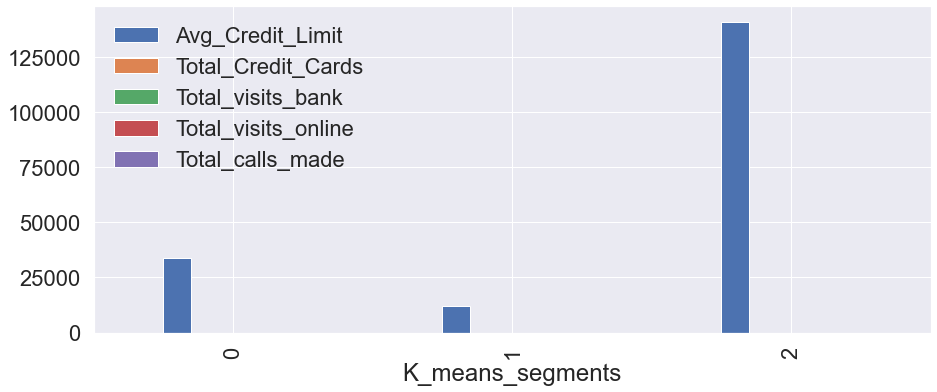

In [72]:
kDF.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='HC_Clusters'>

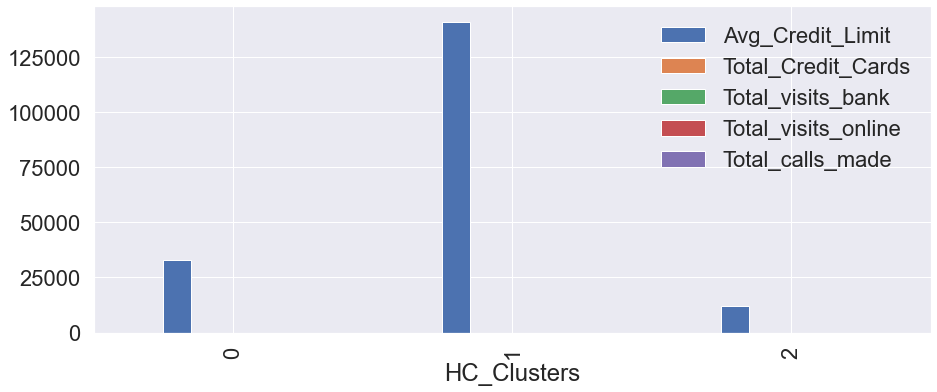

In [73]:
hcDF.groupby('HC_Clusters').mean().plot.bar(figsize=(15,6))

**Bar graphs of algorithm clusters**

<AxesSubplot:xlabel='K_means_segments'>

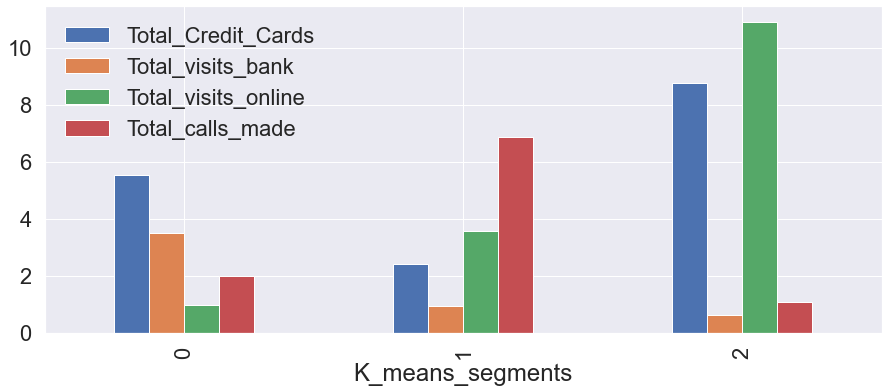

In [74]:
kDF_no_limit.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='HC_Clusters'>

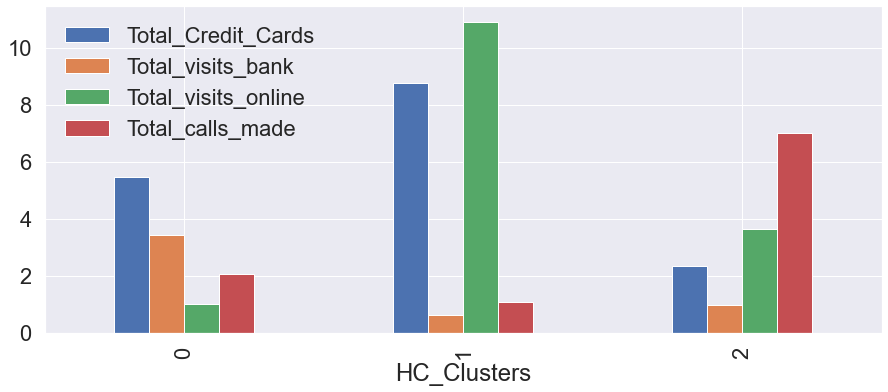

In [75]:
hcDF_no_limit.groupby('HC_Clusters').mean().plot.bar(figsize=(15,6))

**Boxplots of clustered columns**

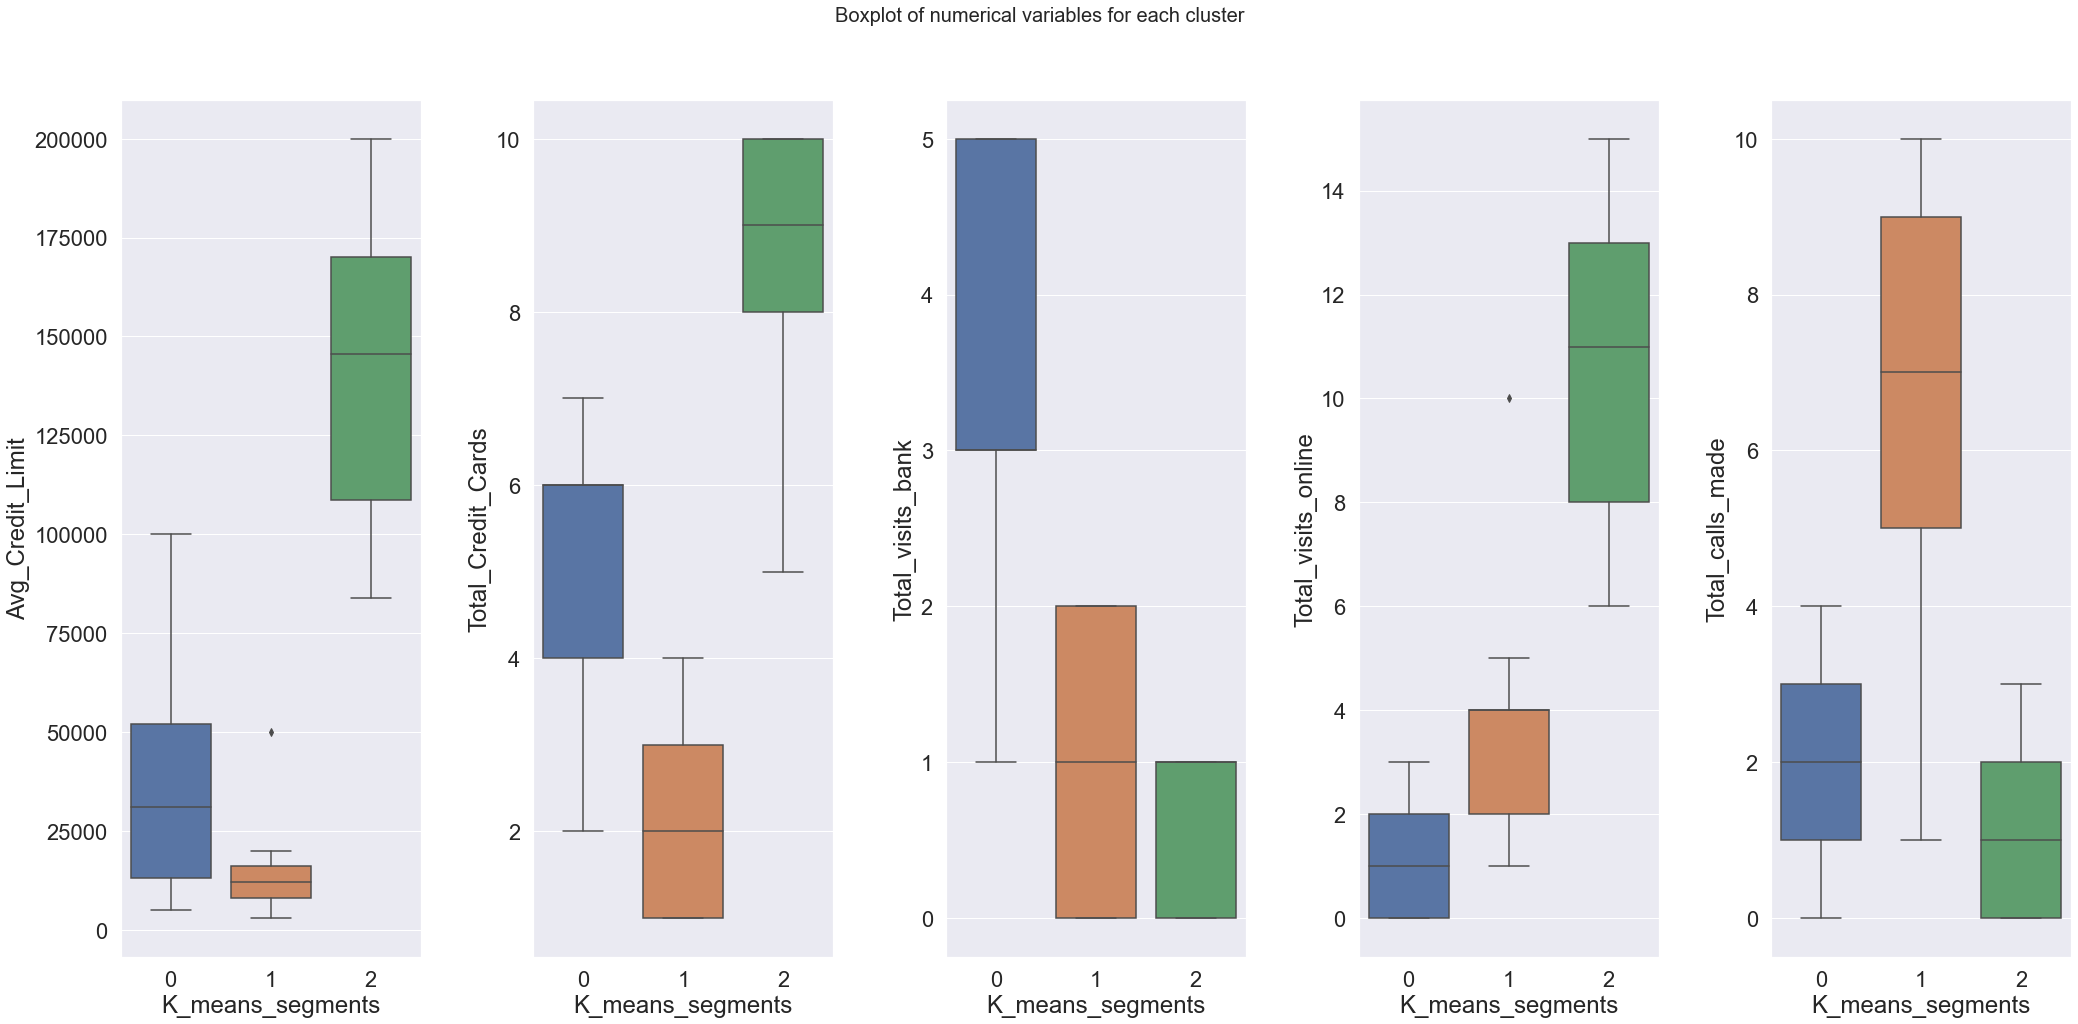

In [76]:
fig, axes = plt.subplots(1, 5,  figsize=(30, 15))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=kDF[all_col[counter]],x=kDF['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

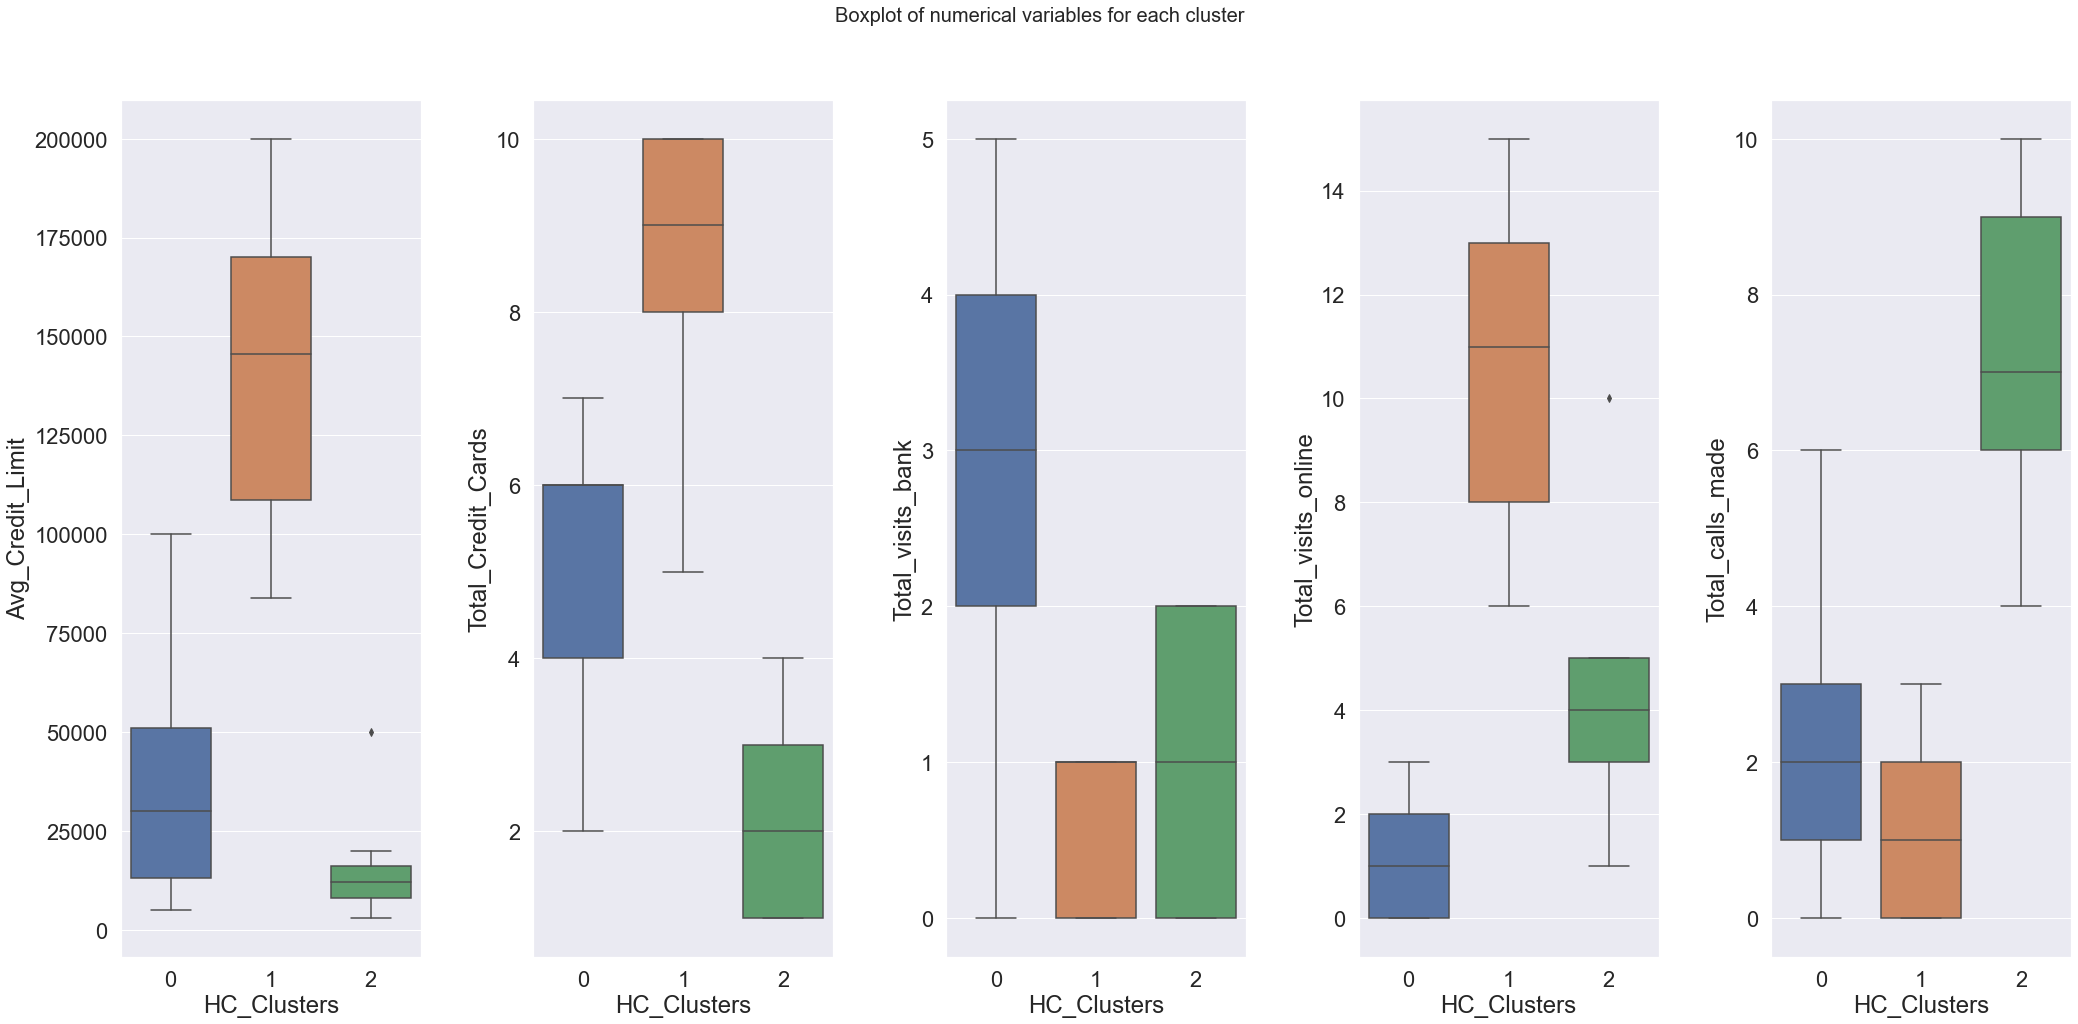

In [78]:
fig, axes = plt.subplots(1, 5,  figsize=(30, 15))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=hcDF[all_col[counter]],x=hcDF['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

* The segments in k-means clustering are virtually identical to the segments created by hierarchical clustering.

**Customer Profiles for K-means Clustering**

<u>Cluster 0:</u>
* 386 customers
* Medium credit limits
* Medium number of credit cards
* High visits to the bank
* Low online visits
* Medium calls to the bank

<u>Cluster 1:</u>
* 224 customers
* Low credit limits
* Low number of credit cards
* Medium visits to the bank
* Medium online visits
* High calls to the bank

<u>Cluster 2: </u>
* 50 customers
* High credit limits
* High number of credit cards
* Low visits to the bank
* High online visits
* Low calls to the bank

**Customer Profiles for Hierarchical Clustering**

<u>Cluster 0:</u>
* 397 customers
* Medium credit limits
* Medium number of credit cards
* High visits to the bank
* Low online visits
* Medium calls to the bank

<u>Cluster 1:</u>
* 50 customers
* High credit limits
* High number of credit cards
* Low visits to the bank
* High online visits
* Low calls to the bank

<u>Cluster 2:</u>
* 213 customers
* Low credit limits
* Low number of credit cards
* Medium visits to the bank
* Medium online visits
* High calls to the bank

**Differences and Similarities among Custome Profiles**

The clusters produced by the k-means algorithm and the hierarchical algorithm are mostly similar. The characteristics of the segments are the same and the sizes are comparable. 

* Cluster 0 from k-means is analogous to Cluster 0 from heirarchical clustering
* Cluster 1 from k-means is analogous to Cluster 2 from heirarchical clustering
* Cluster 2 from k-means is analogous to Cluster 1 from heirarchical clustering



***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Insights_and_Recommendations'></a>
# (7) Actionable Insights and Recommendations

The below analysis references the clusters formed by the k-means algorithm.

**Business Recommendations for Marketing Team:**
* Those customers in Cluster 1 have the fewest bank products and represent the greatest growth potential among existing customers. 
* It might be beneficial to conduct additional analysis on the retention of customers in Cluster 1.
* As Cluster 1 customers tend to communicate via phone, it might help to conduct future marketing campaigns via phone. 
* It is also recommended that the bank focus on introducting Cluster 1 customers to online banking to increase customer reliance on and interactions with bank services. 

**Business Recommendations for Operations Team:**
* Those customers in Cluster 2 make greater use of online banking. As these customers have the highest number of credit card products with the bank as well as the highest credit limits amongst bank customers, it could help solidify the bank's relationship with Cluster 2 customers by improving and expanding online banking services and the ability of bank employee's to communicate with customers via the internet.
* Those customers in Cluster 1 make the greatest use of phone calls to communicate with the bank. To improve customer satisfaction and potentially encourage Cluster 1 customers to stay with the bank and purchase more bank products, the bank should focus on improving customer experience via phone.  

***
[[Table of Contents](#Table_of_Contents)]
***